In [1]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [2]:
#finds the directory path for the file
dir_path = os.path.dirname(os.path.realpath('.\data\countries-aggregated.csv'))
dir_path
f = []
for (dirpath, dirnames, filenames) in os.walk(dir_path):
    f.extend(filenames)
    break
#Makes a list of all the files with the .csv ending
files=[]
for Type in f:
    if Type.endswith('.csv'):
        files.append(Type)
# Makes a list of all the filenames
dfs_names=[]
for x in files:
    n, q =x.split('.')
    dfs_names.append(n)

# Creats a dictionary with all my .cvs files so that I can analyze it with Pandas
dfs={}
for dfn,file in zip(dfs_names, files):
    #print("./data/" + file)
    print('Loading...',dfn)
    dfs[dfn] = pd.read_csv("./data/" + file, index_col=[0], parse_dates=[1,2,-2,-1])  #index column is the first column, and the 2nd or 3rd (or columns 1, 2) is the date column so we can parse that ahead
print('Finished Loading')

Loading... CA_by_county
Loading... CDC_Cases_and_deaths
Loading... complete_vaccine_rate
Loading... countries-aggregated
Loading... COVID_Varients
Loading... data_county_current
Loading... data_county_timeseries
Loading... DECENNIALPL2020
Loading... key-countries-pivoted
Loading... reference
Loading... States_with_boarders
Loading... state_abriv
Loading... state_neighbors
Loading... time-series-19-covid-combined
Loading... Total_County_Data
Loading... Total_States
Loading... us_confirmed
Loading... us_county_population_data
Loading... us_deaths
Loading... us_simplified
Loading... us_simplified_with_county_data
Loading... Utah_Pop
Loading... vaccine_rate_by_county
Loading... worldwide-aggregate
Finished Loading


In [3]:
us_confirmed = dfs["us_confirmed"].copy()
us_confirmed

,Admin2,Date,Case,Country/Region,Province/State
index,,,,,
0,Autauga,2020-01-22,0,US,Alabama
1,Autauga,2020-01-23,0,US,Alabama
2,Autauga,2020-01-24,0,US,Alabama
3,Autauga,2020-01-25,0,US,Alabama
4,Autauga,2020-01-26,0,US,Alabama
...,...,...,...,...,...
2449681,Weston,2022-01-19,1332,US,Wyoming
2449682,Weston,2022-01-20,1341,US,Wyoming
2449683,Weston,2022-01-21,1349,US,Wyoming


#### Codebook:
'STATE_NAME': state name as an abbreviation

'STATE': state fips code as integer

'COUNTY_NAME': county name appended with "County" or "Parish"

'COUNTY': 5-digit county fips code as integer

'GEOFLAG': 'County' denotes county level data; 'State' denotes downscaled state data

'DATE': This date is more representative of data updating processes rather than of the vaccination process. It may also not be the same day of the week every week. Thus we recommend using the WEEK and YEAR column for analyses.

'CASE_TYPE': 'Booster' or 'Booster Coverage': protection with an additional dose for compltely protected individuals; 'Complete' or 'Complete Coverage" : complete protection with 2-dose Moderna or Pfizer or 1-dose Janssen; 'Partial' or 'Partial Coverage" : partial protection with 1-dose Moderna or Pfizer

'CASES': counts for CASE_TYPE = Booster or Complete or Partial; percentages of population for CASE_TYPE = Booster Coverage or Complete Coverage or Partial Coverage

'WEEK' = the ISO week of the year the data is for. (The DATE column is a date within this week, but not always the same day of the week. Thus, we recommend use of the WEEK and YEAR column instead of DATE for all analyses.)

'YEAR' = the year that the data corresponds to

'DEMO_GROUP' = racial/ethnic group

In [7]:
data_county_timeseries = dfs["data_county_timeseries"].copy()
data_county_timeseries

,STATE,COUNTY_NAME,COUNTY,GEOFLAG,DATE,CASE_TYPE,CASES,POPN,WEEK,YEAR
STATE_NAME,,,,,,,,,,
AL,1.0,Autauga,1001,County,2021-12-19,Booster,4791.0,55869.0,50,2021-01-01
AL,1.0,Autauga,1001,County,2021-12-26,Booster,5303.0,55869.0,51,2021-01-01
AL,1.0,Autauga,1001,County,2022-01-02,Booster,5673.0,55869.0,52,2021-01-01
AL,1.0,Autauga,1001,County,2022-01-09,Booster,6139.0,55869.0,1,2022-01-01
AL,1.0,Autauga,1001,County,2022-01-16,Booster,6526.0,55869.0,2,2022-01-01
...,...,...,...,...,...,...,...,...,...,...
VI,78.0,St. Thomas Island,78030,County,2022-04-03,Partial,29350.0,NaN,13,2022-01-01
VI,78.0,St. Thomas Island,78030,County,2022-04-10,Partial,29423.0,NaN,14,2022-01-01
VI,78.0,St. Thomas Island,78030,County,2022-04-17,Partial,29487.0,NaN,15,2022-01-01


In [5]:
data_county_timeseries.min()

STATE                          1.0
COUNTY_NAME              Abbeville
COUNTY                        1001
GEOFLAG                     County
DATE                    2021-01-04
CASE_TYPE                  Booster
CASES                     0.000283
POPN                          86.0
WEEK                             1
YEAR           2021-01-01 00:00:00
dtype: object

In [6]:
us_confirmed.min()

C:\Users\User\AppData\Local\Temp\ipykernel_28108\1333027331.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  us_confirmed.min()


Date              2020-01-22 00:00:00
Case                                0
Country/Region                     US
Province/State                Alabama
dtype: object

In [7]:
# So the data doesn't go back before 1/1/2021.  That's not as far back as the other data I have is.

In [8]:
np.shape(data_county_timeseries['COUNTY_NAME'].unique())

(1954,)

In [9]:
np.shape(us_confirmed['Admin2'].unique())

(1981,)

In [10]:
# There are some repeat county names, so Lets's look at that
np.shape(data_county_timeseries['COUNTY'].unique())

(3224,)

In [11]:
us_confirmed.groupby(['Province/State','Admin2']).sum()

Case
Province/State Admin2              
Alabama        Autauga      3523337
               Baldwin     11905296
               Barbour      1261086
               Bibb         1410004
               Blount       3484256
...                             ...
Wyoming        Teton        1830091
               Uinta        1202016
               Unassigned       420
               Washakie      502625
               Weston        342738

[3336 rows x 1 columns]

In [12]:
data_county_timeseries.groupby(['STATE_NAME','COUNTY_NAME']).sum()

COUNTY         CASES        POPN
STATE_NAME COUNTY_NAME                                                   
AK         Aleutians East Borough        636108  2.945005e+05   1054492.0
           Aleutians West Census Area    637056  4.128938e+05   1780344.0
           Anchorage Municipality        638320  2.145642e+07  91008000.0
           Bethel Census Area            647800  1.455870e+06   5809976.0
           Bristol Bay Borough           650960  1.170230e+05    264176.0
...                                         ...           ...         ...
WY         Sweetwater                  17707692  2.267204e+06  13380388.0
           Teton                       17708324  2.514969e+06   7414624.0
           Uinta                       17708956  1.096066e+06   6391416.0
           Washakie                    17709588  3.868973e+05   2466380.0
           Weston                      17710220  2.961606e+05   2188932.0

[3224 rows x 3 columns]

In [ ]:
# Seems to be around the same number of counties in each dataset.  
# I know there are Out_Of_[State] and Unassigned datapoints in the us_confirmed data so that is hopefully most of it

In [14]:
data_county_timeseries.groupby(['STATE_NAME','COUNTY_NAME','CASE_TYPE']).max()

STATE  COUNTY  \
STATE_NAME COUNTY_NAME            CASE_TYPE                         
AK         Aleutians East Borough Booster             2.0    2013   
                                  Booster Coverage    2.0    2013   
                                  Complete            2.0    2013   
                                  Complete Coverage   2.0    2013   
                                  Partial             2.0    2013   
...                                                   ...     ...   
WY         Weston                 Booster Coverage   56.0   56045   
                                  Complete           56.0   56045   
                                  Complete Coverage  56.0   56045   
                                  Partial            56.0   56045   
                                  Partial Coverage   56.0   56045   

                                                          GEOFLAG        DATE  \
STATE_NAME COUNTY_NAME            CASE_TYPE                                     
AK         Aleutians East Borough Booster                  County  2022-04-26   
                                  Booster Coverage         County  2022-04-26   
                                  Complete           Interpolated  2022-04-26   
                                  Complete Coverage  Interpolated  2022-04-26   
                                  Partial            Interpolated  2022-04-26   
...                                                           ...         ...   
WY         Weston                 Booster Coverage         County  2022-04-26   
                                  Complete           Interpolated  2022-04-26   
                                  Complete Coverage  Interpolated  2022-04-26   
                                  Partial            Interpolated  2022-04-26   
                                  Partial Coverage   Interpolated  2022-04-26   

                                                           CASES    POPN WEEK  \
STATE_NAME COUNTY_NAME            CASE_TYPE                                     
AK         Aleutians East Borough Booster             912.000000  3337.0    9   
                                  Booster Coverage     27.329937  3337.0    9   
                                  Complete           2512.000000  3337.0    9   
                                  Complete Coverage    75.277195  3337.0    9   
                                  Partial            2845.000000  3337.0    9   
...                                                          ...     ...  ...   
WY         Weston                 Booster Coverage     18.146384  6927.0    9   
                                  Complete           2625.000000  6927.0    9   
                                  Complete Coverage    37.895193  6927.0    9   
                                  Partial            2849.000000  6927.0    9   
                                  Partial Coverage     41.128916  6927.0    9   

                                                          YEAR  
STATE_NAME COUNTY_NAME            CASE_TYPE                     
AK         Aleutians East Borough Booster           2022-01-01  
                                  Booster Coverage  2022-01-01  
                                  Complete          2022-01-01  
                                  Complete Coverage 2022-01-01  
                                  Partial           2022-01-01  
...                                                        ...  
WY         Weston                 Booster Coverage  2022-01-01  
                                  Complete          2022-01-01  
                                  Complete Coverage 2022-01-01  
                                  Partial           2022-01-01  
                                  Partial Coverage  2022-01-01  

[19092 rows x 8 columns]

In [ ]:
# Mabybe we can use the coverages for each county.
# First vaccination was December 14, 2020 which explains why no reall data until January 2021
# So we can just assign 0% Coverage before that time.

In [15]:
data_county_timeseries['CASE_TYPE'].unique()

array(['Booster', 'Booster Coverage', 'Complete', 'Complete Coverage',
       'Partial', 'Partial Coverage'], dtype=object)

In [ ]:
# what I need to do is make a new column for each county at each time and have them bee the booster coverage precentage.  

In [16]:
# Seems like there may be some counties which don't have some of the CASE_TYPE columns.
data_county_timeseries['CASE_TYPE'].value_counts()

Complete             222041
Partial              220986
Complete Coverage    216586
Partial Coverage     215531
Booster               69717
Booster Coverage      68077
Name: CASE_TYPE, dtype: int64

In [17]:
data_county_timeseries.groupby(['STATE_NAME','COUNTY_NAME','CASE_TYPE']).min()

STATE  COUNTY GEOFLAG  \
STATE_NAME COUNTY_NAME            CASE_TYPE                                 
AK         Aleutians East Borough Booster             2.0    2013  County   
                                  Booster Coverage    2.0    2013  County   
                                  Complete            2.0    2013  County   
                                  Complete Coverage   2.0    2013  County   
                                  Partial             2.0    2013  County   
...                                                   ...     ...     ...   
WY         Weston                 Booster Coverage   56.0   56045  County   
                                  Complete           56.0   56045  County   
                                  Complete Coverage  56.0   56045  County   
                                  Partial            56.0   56045  County   
                                  Partial Coverage   56.0   56045  County   

                                                           DATE       CASES  \
STATE_NAME COUNTY_NAME            CASE_TYPE                                   
AK         Aleutians East Borough Booster            2021-12-19  516.000000   
                                  Booster Coverage   2021-12-19   15.462991   
                                  Complete           2021-01-10   78.000000   
                                  Complete Coverage  2021-01-10    2.337429   
                                  Partial            2021-01-10  444.000000   
...                                                         ...         ...   
WY         Weston                 Booster Coverage   2021-12-19   12.675040   
                                  Complete           2021-01-10   15.000000   
                                  Complete Coverage  2021-01-10    0.216544   
                                  Partial            2021-01-10  307.000000   
                                  Partial Coverage   2021-01-10    4.431933   

                                                       POPN WEEK       YEAR  
STATE_NAME COUNTY_NAME            CASE_TYPE                                  
AK         Aleutians East Borough Booster            3337.0    1 2021-01-01  
                                  Booster Coverage   3337.0    1 2021-01-01  
                                  Complete           3337.0    1 2021-01-01  
                                  Complete Coverage  3337.0    1 2021-01-01  
                                  Partial            3337.0    1 2021-01-01  
...                                                     ...  ...        ...  
WY         Weston                 Booster Coverage   6927.0    1 2021-01-01  
                                  Complete           6927.0    1 2021-01-01  
                                  Complete Coverage  6927.0    1 2021-01-01  
                                  Partial            6927.0    1 2021-01-01  
                                  Partial Coverage   6927.0    1 2021-01-01  

[19092 rows x 8 columns]

In [ ]:
# I think we can consider that complete coverage includes 1st and 2nd dose of the Pfizer/Maderna vaccines back in early 2021 
# additional boosters were made available after September 22, 2021.

### Creating pivot table of state vaccination rates

In [18]:
data_county_timeseries.reset_index().pivot(index='DATE', columns=['STATE_NAME','COUNTY_NAME','CASE_TYPE'], values='CASES').interpolate(method='linear').fillna(0)

STATE_NAME       AL                                                   \
COUNTY_NAME Autauga                                                    
CASE_TYPE   Booster Booster Coverage      Complete Complete Coverage   
DATE                                                                   
2021-01-04      0.0         0.000000      0.000000          0.000000   
2021-01-05      0.0         0.000000      0.000000          0.000000   
2021-01-06      0.0         0.000000      0.000000          0.000000   
2021-01-07      0.0         0.000000      0.000000          0.000000   
2021-01-08      0.0         0.000000      0.000000          0.000000   
...             ...              ...           ...               ...   
2022-04-22   8029.0        14.371118  24669.333333         44.155674   
2022-04-23   8035.0        14.381858  24676.166667         44.167905   
2022-04-24   8041.0        14.392597  24683.000000         44.180136   
2022-04-25   8044.0        14.397967  24686.000000         44.185505   
2022-04-26   8047.0        14.403336  24689.000000         44.190875   

STATE_NAME                                                                 \
COUNTY_NAME                                      Baldwin                    
CASE_TYPE         Partial Partial Coverage       Booster Booster Coverage   
DATE                                                                        
2021-01-04       0.000000         0.000000      0.000000         0.000000   
2021-01-05       0.000000         0.000000      0.000000         0.000000   
2021-01-06       0.000000         0.000000      0.000000         0.000000   
2021-01-07       0.000000         0.000000      0.000000         0.000000   
2021-01-08       0.000000         0.000000      0.000000         0.000000   
...                   ...              ...           ...              ...   
2022-04-22   31061.666667        55.597320  40014.333333        17.924838   
2022-04-23   31069.333333        55.611042  40058.166667        17.944474   
2022-04-24   31077.000000        55.624765  40102.000000        17.964109   
2022-04-25   31081.000000        55.631925  40120.000000        17.972173   
2022-04-26   31085.000000        55.639084  40138.000000        17.980236   

STATE_NAME                                    ...              PR  \
COUNTY_NAME                                   ... Yauco Municipio   
CASE_TYPE         Complete Complete Coverage  ...         Partial   
DATE                                          ...                   
2021-01-04        0.000000          0.000000  ...        0.000000   
2021-01-05        0.000000          0.000000  ...        0.000000   
2021-01-06        0.000000          0.000000  ...        0.000000   
2021-01-07        0.000000          0.000000  ...        0.000000   
2021-01-08        0.000000          0.000000  ...        0.000000   
...                    ...               ...  ...             ...   
2022-04-22   113537.333333         50.860233  ...    33009.333333   
2022-04-23   113578.666667         50.878749  ...    33016.166667   
2022-04-24   113620.000000         50.897265  ...    33023.000000   
2022-04-25   113641.000000         50.906672  ...    33037.000000   
2022-04-26   113662.000000         50.916079  ...    33051.000000   

STATE_NAME                VI                                              \
COUNTY_NAME St. Croix Island                             St. John Island   
CASE_TYPE            Booster      Complete       Partial         Booster   
DATE                                                                       
2021-01-04          0.000000      0.000000      0.000000        0.000000   
2021-01-05          0.000000      0.000000      0.000000        0.000000   
2021-01-06          0.000000      0.000000      0.000000        0.000000   
2021-01-07          0.000000      0.000000      0.000000        0.000000   
2021-01-08          0.000000      0.000000      0.000000        0.000000   
...                      ...           ... 

In [19]:
data_county_timeseries.reset_index().pivot(index='DATE', columns=['STATE_NAME','COUNTY_NAME','CASE_TYPE'], values='CASES').interpolate(method='linear', limit_direction='backward')

STATE_NAME       AL                                                   \
COUNTY_NAME Autauga                                                    
CASE_TYPE   Booster Booster Coverage      Complete Complete Coverage   
DATE                                                                   
2021-01-04   4791.0         8.575417    127.000000          0.227317   
2021-01-05   4791.0         8.575417    127.000000          0.227317   
2021-01-06   4791.0         8.575417    127.000000          0.227317   
2021-01-07   4791.0         8.575417    127.000000          0.227317   
2021-01-08   4791.0         8.575417    127.000000          0.227317   
...             ...              ...           ...               ...   
2022-04-22   8029.0        14.371118  24669.333333         44.155674   
2022-04-23   8035.0        14.381858  24676.166667         44.167905   
2022-04-24   8041.0        14.392597  24683.000000         44.180136   
2022-04-25   8044.0        14.397967  24686.000000         44.185505   
2022-04-26   8047.0        14.403336  24689.000000         44.190875   

STATE_NAME                                                                 \
COUNTY_NAME                                      Baldwin                    
CASE_TYPE         Partial Partial Coverage       Booster Booster Coverage   
DATE                                                                        
2021-01-04     742.000000         1.328107  26321.000000        11.790767   
2021-01-05     742.000000         1.328107  26321.000000        11.790767   
2021-01-06     742.000000         1.328107  26321.000000        11.790767   
2021-01-07     742.000000         1.328107  26321.000000        11.790767   
2021-01-08     742.000000         1.328107  26321.000000        11.790767   
...                   ...              ...           ...              ...   
2022-04-22   31061.666667        55.597320  40014.333333        17.924838   
2022-04-23   31069.333333        55.611042  40058.166667        17.944474   
2022-04-24   31077.000000        55.624765  40102.000000        17.964109   
2022-04-25   31081.000000        55.631925  40120.000000        17.972173   
2022-04-26   31085.000000        55.639084  40138.000000        17.980236   

STATE_NAME                                    ...              PR  \
COUNTY_NAME                                   ... Yauco Municipio   
CASE_TYPE         Complete Complete Coverage  ...         Partial   
DATE                                          ...                   
2021-01-04      478.000000          0.214125  ...     2048.000000   
2021-01-05      478.000000          0.214125  ...     2048.000000   
2021-01-06      478.000000          0.214125  ...     2048.000000   
2021-01-07      478.000000          0.214125  ...     2048.000000   
2021-01-08      478.000000          0.214125  ...     2048.000000   
...                    ...               ...  ...             ...   
2022-04-22   113537.333333         50.860233  ...    33009.333333   
2022-04-23   113578.666667         50.878749  ...    33016.166667   
2022-04-24   113620.000000         50.897265  ...    33023.000000   
2022-04-25   113641.000000         50.906672  ...    33037.000000   
2022-04-26   113662.000000         50.916079  ...    33051.000000   

STATE_NAME                VI                                              \
COUNTY_NAME St. Croix Island                             St. John Island   
CASE_TYPE            Booster      Complete       Partial         Booster   
DATE                                                                       
2021-01-04       4372.000000    117.000000    776.000000      606.000000   
2021-01-05       4372.000000    117.000000    776.000000      606.000000   
2021-01-06       4372.000000    117.000000    776.000000      606.000000   
2021-01-07       4372.000000    117.000000    776.000000      606.000000   
2021-01-08       4372.000000    117.000000    776.000000      606.000000   
...                      ...           ... 

In [ ]:
# I'm going to favor the backwards interpolation for my first test of this.  Dates before 2021-01-04 are all going to be set to 0 because no vaccine was available before then

In [8]:
# All my other data lists the states as their names not as 2 letter postal abriviations
data_county_timeseries_2=pd.merge(data_county_timeseries, dfs['state_abriv'][['Postal','State']], left_on= 'STATE_NAME', right_on='Postal').drop(columns=['Postal','STATE', 'COUNTY','WEEK']).set_index('State')
data_county_timeseries_2

,COUNTY_NAME,GEOFLAG,DATE,CASE_TYPE,CASES,POPN,YEAR
State,,,,,,,
Alabama,Autauga,County,2021-12-19,Booster,4791.0,55869.0,2021-01-01
Alabama,Autauga,County,2021-12-26,Booster,5303.0,55869.0,2021-01-01
Alabama,Autauga,County,2022-01-02,Booster,5673.0,55869.0,2021-01-01
Alabama,Autauga,County,2022-01-09,Booster,6139.0,55869.0,2022-01-01
Alabama,Autauga,County,2022-01-16,Booster,6526.0,55869.0,2022-01-01
...,...,...,...,...,...,...,...
Virgin Islands,St. Thomas Island,County,2022-04-03,Partial,29350.0,NaN,2022-01-01
Virgin Islands,St. Thomas Island,County,2022-04-10,Partial,29423.0,NaN,2022-01-01
Virgin Islands,St. Thomas Island,County,2022-04-17,Partial,29487.0,NaN,2022-01-01


In [9]:
Vac_Rates= data_county_timeseries_2.reset_index().pivot(index='DATE', columns=['State','COUNTY_NAME','CASE_TYPE'], \
                                                      values='CASES').interpolate(method='linear', limit_direction='backward')

In [44]:
# This works well for the time series data by county but I'll aslo need this by state.  Hard to guess if we want the average vaccine rate or minimum for each state.
# When in doubt I think mean is the best option since we are considering the state as a whole and not looking at best case or worst case scenarios
data_county_timeseries_2.groupby(['State','CASE_TYPE', 'DATE']).mean()

CASES          POPN
State   CASE_TYPE        DATE                                  
Alabama Booster          2021-12-19   7881.776119  73181.865672
                         2021-12-26   8568.656716  73181.865672
                         2022-01-02   9049.626866  73181.865672
                         2022-01-09   9606.388060  73181.865672
                         2022-01-16  10147.686567  73181.865672
...                                           ...           ...
Wyoming Partial Coverage 2022-04-03     51.801741  25163.434783
                         2022-04-10     51.873217  25163.434783
                         2022-04-17     51.941839  25163.434783
                         2022-04-24     52.008334  25163.434783
                         2022-04-26     52.030307  25163.434783

[18435 rows x 2 columns]

In [47]:
# Now can I create a pivot table based on this grouping?
State_Vac_Rates=data_county_timeseries_2.groupby(['State','CASE_TYPE', 'DATE']).mean().drop(columns=['POPN']).unstack().T. \
interpolate(method='linear', limit_direction='backward')
State_Vac_Rates

State                  Alabama                                 \
CASE_TYPE              Booster Booster Coverage      Complete   
      DATE                                                      
CASES 2021-01-04   7881.776119         9.989436    647.555556   
      2021-01-05   7881.776119         9.989436    647.555556   
      2021-01-06   7881.776119         9.989436    647.555556   
      2021-01-07   7881.776119         9.989436    647.555556   
      2021-01-08   7881.776119         9.989436    647.555556   
...                        ...              ...           ...   
      2022-04-22  12421.447761        15.560277  34511.517413   
      2022-04-23  12432.679104        15.575271  34521.101990   
      2022-04-24  12443.910448        15.590264  34530.686567   
      2022-04-25  12449.925373        15.596751  34535.529851   
      2022-04-26  12455.940299        15.603237  34540.373134   

State                                                              \
CASE_TYPE        Complete Coverage       Partial Partial Coverage   
      DATE                                                          
CASES 2021-01-04          2.530462   2942.000000         4.069351   
      2021-01-05          2.530462   2942.000000         4.069351   
      2021-01-06          2.530462   2942.000000         4.069351   
      2021-01-07          2.530462   2942.000000         4.069351   
      2021-01-08          2.530462   2942.000000         4.069351   
...                            ...           ...              ...   
      2022-04-22         43.809817  42321.124378        53.699855   
      2022-04-23         43.821460  42329.875622        53.710380   
      2022-04-24         43.833102  42338.626866        53.720905   
      2022-04-25         43.838219  42343.649254        53.726543   
      2022-04-26         43.843337  42348.671642        53.732181   

State                  Alaska                                 \
CASE_TYPE             Booster Booster Coverage      Complete   
      DATE                                                     
CASES 2021-01-04  4412.482759        21.475284    296.133333   
      2021-01-05  4412.482759        21.475284    296.133333   
      2021-01-06  4412.482759        21.475284    296.133333   
      2021-01-07  4412.482759        21.475284    296.133333   
      2021-01-08  4412.482759        21.475284    296.133333   
...                       ...              ...           ...   
      2022-04-22  6607.022989        30.925340  15290.022989   
      2022-04-23  6613.908046        30.956670  15299.218391   
      2022-04-24  6620.793103        30.988001  15308.413793   
      2022-04-25  6625.982759        31.008529  15310.793103   
      2022-04-26  6631.172414        31.029058  15313.172414   

State                               ...     Wisconsin                    \
CASE_TYPE        Complete Coverage  ...      Complete Complete Coverage   
      DATE                          ...                                   
CASES 2021-01-04          2.019886  ...    491.210526          0.361442   
      2021-01-05          2.019886  ...    491.210526          0.361442   
      2021-01-06          2.019886  ...    491.210526          0.361442   
      2021-01-07          2.019886  ...    491.210526          0.361442   
      2021-01-08          2.019886  ...    491.210526          0.361442   
...                            ...  ...           ...               ...   
      2022-04-22         64.334219  ...  51251.208333         58.861210   
      2022-04-23         64.351165  ...  51264.222222         58.877287   
      2022-04-24         64.368111  ...  51277.236111         58.893364   
      2022-04-25         64.375356  ...  51280.611111         58.896496   
      2022-04-26         64.382602  ...  51283.986111         58.899628   

State                                                Wyoming                   \
CASE_TYPE              Partial Partial Coverage      Booster Booster Coverage   
      DATE  

In [10]:
Vac_Rates

State       Alabama                                                   \
COUNTY_NAME Autauga                                                    
CASE_TYPE   Booster Booster Coverage      Complete Complete Coverage   
DATE                                                                   
2021-01-04   4791.0         8.575417    127.000000          0.227317   
2021-01-05   4791.0         8.575417    127.000000          0.227317   
2021-01-06   4791.0         8.575417    127.000000          0.227317   
2021-01-07   4791.0         8.575417    127.000000          0.227317   
2021-01-08   4791.0         8.575417    127.000000          0.227317   
...             ...              ...           ...               ...   
2022-04-22   8029.0        14.371118  24669.333333         44.155674   
2022-04-23   8035.0        14.381858  24676.166667         44.167905   
2022-04-24   8041.0        14.392597  24683.000000         44.180136   
2022-04-25   8044.0        14.397967  24686.000000         44.185505   
2022-04-26   8047.0        14.403336  24689.000000         44.190875   

State                                                                      \
COUNTY_NAME                                      Baldwin                    
CASE_TYPE         Partial Partial Coverage       Booster Booster Coverage   
DATE                                                                        
2021-01-04     742.000000         1.328107  26321.000000        11.790767   
2021-01-05     742.000000         1.328107  26321.000000        11.790767   
2021-01-06     742.000000         1.328107  26321.000000        11.790767   
2021-01-07     742.000000         1.328107  26321.000000        11.790767   
2021-01-08     742.000000         1.328107  26321.000000        11.790767   
...                   ...              ...           ...              ...   
2022-04-22   31061.666667        55.597320  40014.333333        17.924838   
2022-04-23   31069.333333        55.611042  40058.166667        17.944474   
2022-04-24   31077.000000        55.624765  40102.000000        17.964109   
2022-04-25   31081.000000        55.631925  40120.000000        17.972173   
2022-04-26   31085.000000        55.639084  40138.000000        17.980236   

State                                         ...     Puerto Rico  \
COUNTY_NAME                                   ... Yauco Municipio   
CASE_TYPE         Complete Complete Coverage  ...         Partial   
DATE                                          ...                   
2021-01-04      478.000000          0.214125  ...     2048.000000   
2021-01-05      478.000000          0.214125  ...     2048.000000   
2021-01-06      478.000000          0.214125  ...     2048.000000   
2021-01-07      478.000000          0.214125  ...     2048.000000   
2021-01-08      478.000000          0.214125  ...     2048.000000   
...                    ...               ...  ...             ...   
2022-04-22   113537.333333         50.860233  ...    33009.333333   
2022-04-23   113578.666667         50.878749  ...    33016.166667   
2022-04-24   113620.000000         50.897265  ...    33023.000000   
2022-04-25   113641.000000         50.906672  ...    33037.000000   
2022-04-26   113662.000000         50.916079  ...    33051.000000   

State         Virgin Islands                                              \
COUNTY_NAME St. Croix Island                             St. John Island   
CASE_TYPE            Booster      Complete       Partial         Booster   
DATE                                                                       
2021-01-04       4372.000000    117.000000    776.000000      606.000000   
2021-01-05       4372.000000    117.000000    776.000000      606.000000   
2021-01-06       4372.000000    117.000000    776.000000      606.000000   
2021-01-07       4372.000000    117.000000    776.000000      606.000000   
2021-01-08       4372.000000    117.000000    776.000000      606.000000   
...                      ...           ... 

In [ ]:
# Excellent.  I now have the (interpolated) case rates by county for each date and the case rates by state.

### Looking at population data in each dataset

In [49]:
# We can look at this data without having to do the summation for each state by day if we get the simplified version of the data
simplified = dfs['us_simplified'].copy() # This data only has the confirmed cases and deaths by state for each date no county data
simplified

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region
index,,,,,,
0,2020-01-22,Autauga,Alabama,0,0,US
1,2020-01-23,Autauga,Alabama,0,0,US
2,2020-01-24,Autauga,Alabama,0,0,US
3,2020-01-25,Autauga,Alabama,0,0,US
4,2020-01-26,Autauga,Alabama,0,0,US
...,...,...,...,...,...,...
2449681,2022-01-19,Weston,Wyoming,1332,16,US
2449682,2022-01-20,Weston,Wyoming,1341,16,US
2449683,2022-01-21,Weston,Wyoming,1349,16,US


In [50]:
dfs['reference']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
index,,,,,,,,,,,,
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4210,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4211,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4212,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0


I have the longitude and latitude of all of the countries and counties in every country?

In [51]:
reference=dfs['reference'].copy()

In [52]:
reference[reference['Province_State']=='Virginia']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
index,,,,,,,,,,,,
943,84000051,US,USA,840.0,51.0,NaN,Virginia,US,37.769300,-78.170000,"Virginia, US",8535519.0
1015,84080051,US,USA,840.0,80051.0,Out of VA,Virginia,US,NaN,NaN,"Out of VA, Virginia, US",NaN
1066,84090051,US,USA,840.0,90051.0,Unassigned,Virginia,US,NaN,NaN,"Unassigned, Virginia, US",NaN
3893,84051001,US,USA,840.0,51001.0,Accomack,Virginia,US,37.767072,-75.632346,"Accomack, Virginia, US",32316.0
3894,84051003,US,USA,840.0,51003.0,Albemarle,Virginia,US,38.020807,-78.554811,"Albemarle, Virginia, US",109330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4021,84051800,US,USA,840.0,51800.0,Suffolk,Virginia,US,36.701554,-76.636036,"Suffolk, Virginia, US",92108.0
4022,84051810,US,USA,840.0,51810.0,Virginia Beach,Virginia,US,36.732857,-76.045669,"Virginia Beach, Virginia, US",449974.0
4023,84051820,US,USA,840.0,51820.0,Waynesboro,Virginia,US,38.064515,-78.902939,"Waynesboro, Virginia, US",22630.0


In [53]:
reference[reference['Admin2']=='San Francisco']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
index,,,,,,,,,,,,
1296,84006075,US,USA,840.0,6075.0,San Francisco,California,US,37.752151,-122.438567,"San Francisco, California, US",881549.0


In [54]:
county_boundries=pd.read_csv('./data/boarders/us-county-boundaries.csv', sep=';')

In [55]:
San_Francisco=county_boundries[county_boundries['NAMELSAD']=='San Francisco County']
San_Francisco

,Geo Point,Geo Shape,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,STUSAB,LSAD,...,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,STATE_NAME,COUNTYFP NOZERO
1188,"37.7597150131,-122.693975573","{""coordinates"": [[[[-122.612285, 37.815224], [...",6,75,277302,6075,San Francisco,San Francisco County,CA,6,...,488.0,41860.0,41884.0,C,121477743,479114582,37.727239,-123.032229,California,75


Long and Lat look the same.  the only benifit I get from this data is the "Geo Shape" and land area and water area of the county.  I don't know if these are necessary so let's do the easy thing and use the reference data.

Okay.  There are two things in this.  "Coordinates" and "type" within the GEO SHAPE... This seems complicated so I'll table it for later.

In [56]:
reference[reference['Admin2']=='Alameda']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
index,,,,,,,,,,,,
1259,84006001,US,USA,840.0,6001.0,Alameda,California,US,37.646294,-121.892927,"Alameda, California, US",1671329.0


In [57]:
Ca_by_county=dfs["CA_by_county"]
Ca_by_county.head(1)

,Total Cases,Total Deaths,2022 Population,Growth Since 2010,Density (mi²),Cases per 1K pop,Deaths per 1K pop,Cases by Density (mi²)
Alameda County,44597298,558125,1685048.0,11.37%,2279.89,0.026466,0.0003312220186012,19561.162161332348


In [58]:
data_county_timeseries[data_county_timeseries['COUNTY_NAME']=='Alameda'].head(1)

,STATE,COUNTY_NAME,COUNTY,GEOFLAG,DATE,CASE_TYPE,CASES,POPN,WEEK,YEAR
STATE_NAME,,,,,,,,,,
CA,6.0,Alameda,6001,County,2021-08-17,Booster,1052.0,1671329.0,33,2021-01-01


Looks like the reference population and county_timeseries data are a little behind.  They look like they have from 2018 population data.

In [59]:
# Unaassigned data is the same Admin2 name in each state.  I need to rename that data or create a combined key so they don't get grouped by accident.
simplified['Combined_Key']=simplified['Admin2'] + ', ' + simplified['Province/State'] + ', ' + simplified['Country/Region']

In [60]:
simplified

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region,Combined_Key
index,,,,,,,
0,2020-01-22,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
1,2020-01-23,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
2,2020-01-24,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
3,2020-01-25,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
4,2020-01-26,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
...,...,...,...,...,...,...,...
2449681,2022-01-19,Weston,Wyoming,1332,16,US,"Weston, Wyoming, US"
2449682,2022-01-20,Weston,Wyoming,1341,16,US,"Weston, Wyoming, US"
2449683,2022-01-21,Weston,Wyoming,1349,16,US,"Weston, Wyoming, US"


## Updating population data

In [40]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# a place to start if I'm not going from the beginning
reference=dfs['reference'].copy()
reference

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
index,,,,,,,,,,,,
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4210,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4211,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4212,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0


In [41]:
# for some reason there was a tab or some other non visible character in the Combined_Key column so I had to redo it.
reference['Combined_Key']= reference['Admin2'] + ', ' + reference['Province_State'] + ', ' + reference['Country_Region']

In [61]:
# Lets make a list of all the Longitudes and Latitudes of the key US counties
County_Locations=reference[['Combined_Key','Lat','Long_']].groupby('Combined_Key').max() #could be sum() or min() there is only one entry per key but it's needed for the groupby funciton to work
County_Locations

,Lat,Long_
Combined_Key,,
"Abbeville, South Carolina, US",34.223334,-82.461707
"Abia, Nigeria",5.452700,7.524800
"Abruzzo, Italy",42.351222,13.398438
"Acadia, Louisiana, US",30.295065,-92.414197
"Accomack, Virginia, US",37.767072,-75.632346
...,...,...
"Zhejiang, China",29.183200,120.093400
"Zhytomyr Oblast, Ukraine",50.254700,28.658700
"Ziebach, South Dakota, US",44.978819,-101.665462


In [62]:
us_simplified=dfs['us_simplified'].copy()
us_simplified

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region
index,,,,,,
0,2020-01-22,Autauga,Alabama,0,0,US
1,2020-01-23,Autauga,Alabama,0,0,US
2,2020-01-24,Autauga,Alabama,0,0,US
3,2020-01-25,Autauga,Alabama,0,0,US
4,2020-01-26,Autauga,Alabama,0,0,US
...,...,...,...,...,...,...
2449681,2022-01-19,Weston,Wyoming,1332,16,US
2449682,2022-01-20,Weston,Wyoming,1341,16,US
2449683,2022-01-21,Weston,Wyoming,1349,16,US


In [63]:
# Lets make a combined key to merge on 
us_simplified['Combined_Key']=us_simplified['Admin2'] + ", " + us_simplified['Province/State'] + ", " + us_simplified['Country/Region']
    
us_simplified

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region,Combined_Key
index,,,,,,,
0,2020-01-22,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
1,2020-01-23,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
2,2020-01-24,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
3,2020-01-25,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
4,2020-01-26,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
...,...,...,...,...,...,...,...
2449681,2022-01-19,Weston,Wyoming,1332,16,US,"Weston, Wyoming, US"
2449682,2022-01-20,Weston,Wyoming,1341,16,US,"Weston, Wyoming, US"
2449683,2022-01-21,Weston,Wyoming,1349,16,US,"Weston, Wyoming, US"


In [64]:
us_simplified['Combined_Key'].isna().sum()

4398

In [65]:
# Some of the regions don't have a county.  Like out of state or unassigned data
us_simplified['Combined_Key'].fillna(us_simplified['Province/State'] + ", " + us_simplified['Country/Region'], inplace=True)

In [66]:
us_simplified['Combined_Key'].isna().sum()

0

In [67]:
us_simplified.dtypes

Date              datetime64[ns]
Admin2                    object
Province/State            object
Confirmed                  int64
Deaths                    object
Country/Region            object
Combined_Key              object
dtype: object

In [68]:
# Deaths is an object instead of a number.  So let's make it an interger
us_simplified['Deaths'] = pd.to_numeric(us_simplified['Deaths'])
us_simplified.dtypes

Date              datetime64[ns]
Admin2                    object
Province/State            object
Confirmed                  int64
Deaths                     int64
Country/Region            object
Combined_Key              object
dtype: object

In [69]:
# Lets just make a list of all of the counties
us_simplified.groupby('Combined_Key').max()# I could drop the date column because the maxamum is always the last date since the numeric data is culmulative

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region
Combined_Key,,,,,,
"Abbeville, South Carolina, US",2022-01-23,Abbeville,South Carolina,5703,57,US
"Acadia, Louisiana, US",2022-01-23,Acadia,Louisiana,13609,260,US
"Accomack, Virginia, US",2022-01-23,Accomack,Virginia,6230,86,US
"Ada, Idaho, US",2022-01-23,Ada,Idaho,99096,905,US
"Adair, Iowa, US",2022-01-23,Adair,Iowa,1434,46,US
...,...,...,...,...,...,...
"Yuma, Arizona, US",2022-01-23,Yuma,Arizona,55176,1028,US
"Yuma, Colorado, US",2022-01-23,Yuma,Colorado,1644,22,US
"Zapata, Texas, US",2022-01-23,Zapata,Texas,2815,47,US


In [70]:
Total_simplified=us_simplified.groupby('Combined_Key').max().drop(columns='Date')
Total_simplified

,Admin2,Province/State,Confirmed,Deaths,Country/Region
Combined_Key,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US
"Ada, Idaho, US",Ada,Idaho,99096,905,US
"Adair, Iowa, US",Adair,Iowa,1434,46,US
...,...,...,...,...,...
"Yuma, Arizona, US",Yuma,Arizona,55176,1028,US
"Yuma, Colorado, US",Yuma,Colorado,1644,22,US
"Zapata, Texas, US",Zapata,Texas,2815,47,US


In [71]:
County_Locations

,Lat,Long_
Combined_Key,,
"Abbeville, South Carolina, US",34.223334,-82.461707
"Abia, Nigeria",5.452700,7.524800
"Abruzzo, Italy",42.351222,13.398438
"Acadia, Louisiana, US",30.295065,-92.414197
"Accomack, Virginia, US",37.767072,-75.632346
...,...,...
"Zhejiang, China",29.183200,120.093400
"Zhytomyr Oblast, Ukraine",50.254700,28.658700
"Ziebach, South Dakota, US",44.978819,-101.665462


In [72]:
Total_simplified.join(County_Locations)

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_
Combined_Key,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059
...,...,...,...,...,...,...,...
"Yuma, Arizona, US",Yuma,Arizona,55176,1028,US,32.768957,-113.906667
"Yuma, Colorado, US",Yuma,Colorado,1644,22,US,40.003468,-102.425867
"Zapata, Texas, US",Zapata,Texas,2815,47,US,27.001564,-99.169872


In [73]:
# I lost a row... I wonder what it was.
Total_simplified.join(County_Locations, how='left').isna().describe()

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_
count,3342,3342,3342,3342,3342,3342,3342
unique,2,1,1,1,1,2,2
top,False,False,False,False,False,False,False
freq,3336,3342,3342,3342,3342,3232,3232


In [ ]:
# now I have my counties merged with locations.

In [74]:
us_simplified.set_index('Combined_Key').join(County_Locations)

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_
Combined_Key,,,,,,,,
"Abbeville, South Carolina, US",2020-01-22,Abbeville,South Carolina,0,0,US,34.223334,-82.461707
"Abbeville, South Carolina, US",2020-01-23,Abbeville,South Carolina,0,0,US,34.223334,-82.461707
"Abbeville, South Carolina, US",2020-01-24,Abbeville,South Carolina,0,0,US,34.223334,-82.461707
"Abbeville, South Carolina, US",2020-01-25,Abbeville,South Carolina,0,0,US,34.223334,-82.461707
"Abbeville, South Carolina, US",2020-01-26,Abbeville,South Carolina,0,0,US,34.223334,-82.461707
...,...,...,...,...,...,...,...,...
"Ziebach, South Dakota, US",2022-01-19,Ziebach,South Dakota,508,11,US,44.978819,-101.665462
"Ziebach, South Dakota, US",2022-01-20,Ziebach,South Dakota,508,11,US,44.978819,-101.665462
"Ziebach, South Dakota, US",2022-01-21,Ziebach,South Dakota,512,11,US,44.978819,-101.665462


In [75]:
US_Counties=Total_simplified.join(County_Locations)
US_Counties

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_
Combined_Key,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059
...,...,...,...,...,...,...,...
"Yuma, Arizona, US",Yuma,Arizona,55176,1028,US,32.768957,-113.906667
"Yuma, Colorado, US",Yuma,Colorado,1644,22,US,40.003468,-102.425867
"Zapata, Texas, US",Zapata,Texas,2815,47,US,27.001564,-99.169872


In [76]:
US_Counties.isna().sum()

Admin2              6
Province/State      0
Confirmed           0
Deaths              0
Country/Region      0
Lat               110
Long_             110
dtype: int64

In [77]:
US_Counties[US_Counties['Lat'].isna()]

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_
Combined_Key,,,,,,,
"Diamond Princess, US",NaN,Diamond Princess,49,0,US,NaN,NaN
"District of Columbia, District of Columbia, US",District of Columbia,District of Columbia,127200,1267,US,NaN,NaN
"Federal Correctional Institution (FCI), Michigan, US",Federal Correctional Institution (FCI),Michigan,323,5,US,NaN,NaN
"Grand Princess, US",NaN,Grand Princess,103,3,US,NaN,NaN
"Michigan Department of Corrections (MDOC), Michigan, US",Michigan Department of Corrections (MDOC),Michigan,33012,165,US,NaN,NaN
...,...,...,...,...,...,...,...
"Unassigned, Washington, US",Unassigned,Washington,2642,10,US,NaN,NaN
"Unassigned, West Virginia, US",Unassigned,West Virginia,37,20,US,NaN,NaN
"Unassigned, Wisconsin, US",Unassigned,Wisconsin,61,0,US,NaN,NaN


American Samoa is located at 14.2710° S, 170.1322° W

Guam is located at 13.4443° N, 144.7937° E

Northern Mariana Islands are 15.0979° N, 145.6739° E

US Virgin Islands are located at 18.3358° N, 64.8963° W

Yakutat Alaska is located at 59.5469° N, 139.7272° W

In [78]:
# Longitudes that are N are - and Latitudes that are W are +  Therefore if I have a Lat that is S or E it must be negative?
US_Counties['Lat'][US_Counties['Province/State']=='American Samoa']=-14.2710
US_Counties['Long_'][US_Counties['Province/State']=='American Samoa']= -170.1322
US_Counties['Lat'][US_Counties['Province/State']=='Guam']=13.4443
US_Counties['Long_'][US_Counties['Province/State']=='Guam']= 144.7937
US_Counties['Lat'][US_Counties['Province/State']=='Northern Mariana Islands']=15.0979
US_Counties['Long_'][US_Counties['Province/State']=='Northern Mariana Islands']= 145.6739
US_Counties['Lat'][US_Counties['Province/State']=='Virgin Islands']= 18.3358
US_Counties['Long_'][US_Counties['Province/State']=='Virgin Islands']= -64.8963
US_Counties['Lat'][US_Counties['Admin2']=='Yakutat']= 59.5469
US_Counties['Long_'][US_Counties['Admin2']=='Yakutat']= -139.7272

C:\Users\User\AppData\Local\Temp\ipykernel_28108\3327561246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Counties['Lat'][US_Counties['Province/State']=='American Samoa']=-14.2710
C:\Users\User\AppData\Local\Temp\ipykernel_28108\3327561246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Counties['Long_'][US_Counties['Province/State']=='American Samoa']= -170.1322
C:\Users\User\AppData\Local\Temp\ipykernel_28108\3327561246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [ ]:
# yeah yeah I get it there is probably a better way to do this

In [79]:
US_Counties['Lat'][US_Counties['Province/State']=='American Samoa']

Combined_Key
American Samoa, US   -14.271
Name: Lat, dtype: float64

In [80]:
US_Counties[US_Counties['Lat'].isna()]

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_
Combined_Key,,,,,,,
"Diamond Princess, US",NaN,Diamond Princess,49,0,US,NaN,NaN
"District of Columbia, District of Columbia, US",District of Columbia,District of Columbia,127200,1267,US,NaN,NaN
"Federal Correctional Institution (FCI), Michigan, US",Federal Correctional Institution (FCI),Michigan,323,5,US,NaN,NaN
"Grand Princess, US",NaN,Grand Princess,103,3,US,NaN,NaN
"Michigan Department of Corrections (MDOC), Michigan, US",Michigan Department of Corrections (MDOC),Michigan,33012,165,US,NaN,NaN
...,...,...,...,...,...,...,...
"Unassigned, Virginia, US",Unassigned,Virginia,3,140,US,NaN,NaN
"Unassigned, Washington, US",Unassigned,Washington,2642,10,US,NaN,NaN
"Unassigned, West Virginia, US",Unassigned,West Virginia,37,20,US,NaN,NaN


In [ ]:
# To be honest I feel like I should drop these cases from these cruise ships.
# Also the unassigned and correctional facilicities don't have any Long or Lat...

In [81]:
# Can I find the average Long and Lat for each state?
Cal_Loc=US_Counties[US_Counties['Province/State']=='California']
Cal_Loc[['Lat','Long_']].mean()

Lat       37.843962
Long_   -120.728594
dtype: float64

In [82]:
# This method will replace the unassigned areas to the center of the state... Will that be a problem?  Some states are not so regularly shapped.
Cal_Loc['Lat'].fillna(Cal_Loc['Lat'].mean(), inplace=True)
Cal_Loc['Long_'].fillna(Cal_Loc['Long_'].mean(), inplace=True)
Cal_Loc

C:\Users\User\AppData\Local\Temp\ipykernel_28108\3556209025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cal_Loc['Lat'].fillna(Cal_Loc['Lat'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_28108\3556209025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cal_Loc['Long_'].fillna(Cal_Loc['Long_'].mean(), inplace=True)


,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_
Combined_Key,,,,,,,
"Alameda, California, US",Alameda,California,214939,1581,US,37.646294,-121.892927
"Alpine, California, US",Alpine,California,119,0,US,38.596786,-119.822359
"Amador, California, US",Amador,California,7064,73,US,38.445831,-120.656960
"Butte, California, US",Butte,California,32484,351,US,39.667278,-121.600525
"Calaveras, California, US",Calaveras,California,6006,95,US,38.205371,-120.552913
"Colusa, California, US",Colusa,California,3840,21,US,39.178820,-122.233173
"Contra Costa, California, US",Contra Costa,California,162809,1091,US,37.919235,-121.928953
"Del Norte, California, US",Del Norte,California,4368,43,US,41.742283,-123.897406
"El Dorado, California, US",El Dorado,California,24845,179,US,38.779660,-120.523317


<AxesSubplot:xlabel='Long_', ylabel='Lat'>

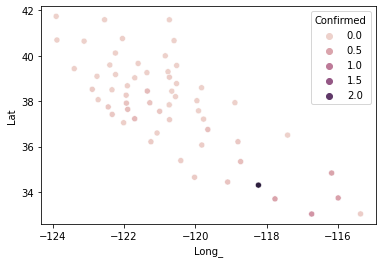

In [83]:
sns.scatterplot(x='Long_',y='Lat', data=Cal_Loc, hue='Confirmed')

In [84]:
# Data from 2020 US Census from data.census.gov
us_county_population_data=dfs['DECENNIALPL2020'].copy()
us_county_population_data

,NAME,P1_001N,P1_002N,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,P1_009N,...,P1_062N,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_070N,P1_071N
GEO_ID,,,,,,,,,,,,,,,,,,,,,
id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...,!!Total:!!Population of one race:!!American I...,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Haw...,!!Total:!!Population of one race:!!Some Other...,!!Total:!!Population of two or more races:,...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...
0500000US01001,"Autauga County, Alabama",58805,55648,42160,11445,217,881,35,910,3157,...,0,2,2,0,0,0,0,0,0,0
0500000US01003,"Baldwin County, Alabama",231767,216743,189399,18217,1582,2067,143,5335,15024,...,0,0,0,0,0,0,0,0,0,0
0500000US01005,"Barbour County, Alabama",25223,24523,11317,11933,116,117,1,1039,700,...,0,2,2,0,0,0,0,0,0,0
0500000US01007,"Bibb County, Alabama",22293,21534,16555,4413,60,32,9,465,759,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0500000US72145,"Vega Baja Municipio, Puerto Rico",54414,27813,10042,3491,460,28,9,13783,26601,...,0,7,0,7,0,0,0,0,0,0
0500000US72147,"Vieques Municipio, Puerto Rico",8249,6127,1551,1256,86,7,1,3226,2122,...,0,0,0,0,0,0,0,0,0,0
0500000US72149,"Villalba Municipio, Puerto Rico",22093,11151,3429,1380,130,10,0,6202,10942,...,0,0,0,0,0,0,0,0,0,0


Looks like row 0 is the meta data for this.  Also this data doens't have the US key added to the end.

In [85]:
# There was an issue with some capitalizations of the word city
us_county_population_data['NAME']=us_county_population_data['NAME'].str.title()

In [86]:
us_county_population_data['Combined_Key']=us_county_population_data['NAME']+ ', US'
us_county_population_data

,NAME,P1_001N,P1_002N,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,P1_009N,...,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_070N,P1_071N,Combined_Key
GEO_ID,,,,,,,,,,,,,,,,,,,,,
id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...,!!Total:!!Population of one race:!!American I...,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Haw...,!!Total:!!Population of one race:!!Some Other...,!!Total:!!Population of two or more races:,...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,"Geographic Area Name, US"
0500000US01001,"Autauga County, Alabama",58805,55648,42160,11445,217,881,35,910,3157,...,2,2,0,0,0,0,0,0,0,"Autauga County, Alabama, US"
0500000US01003,"Baldwin County, Alabama",231767,216743,189399,18217,1582,2067,143,5335,15024,...,0,0,0,0,0,0,0,0,0,"Baldwin County, Alabama, US"
0500000US01005,"Barbour County, Alabama",25223,24523,11317,11933,116,117,1,1039,700,...,2,2,0,0,0,0,0,0,0,"Barbour County, Alabama, US"
0500000US01007,"Bibb County, Alabama",22293,21534,16555,4413,60,32,9,465,759,...,0,0,0,0,0,0,0,0,0,"Bibb County, Alabama, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0500000US72145,"Vega Baja Municipio, Puerto Rico",54414,27813,10042,3491,460,28,9,13783,26601,...,7,0,7,0,0,0,0,0,0,"Vega Baja Municipio, Puerto Rico, US"
0500000US72147,"Vieques Municipio, Puerto Rico",8249,6127,1551,1256,86,7,1,3226,2122,...,0,0,0,0,0,0,0,0,0,"Vieques Municipio, Puerto Rico, US"
0500000US72149,"Villalba Municipio, Puerto Rico",22093,11151,3429,1380,130,10,0,6202,10942,...,0,0,0,0,0,0,0,0,0,"Villalba Municipio, Puerto Rico, US"


In [103]:
us_county_population_data.drop(us_county_population_data.index[0])

,NAME,P1_001N,P1_002N,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,P1_009N,...,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_070N,P1_071N,Combined_Key
GEO_ID,,,,,,,,,,,,,,,,,,,,,
0500000US01001,"Autauga County, Alabama",58805,55648,42160,11445,217,881,35,910,3157,...,2,2,0,0,0,0,0,0,0,"Autauga County, Alabama, US"
0500000US01003,"Baldwin County, Alabama",231767,216743,189399,18217,1582,2067,143,5335,15024,...,0,0,0,0,0,0,0,0,0,"Baldwin County, Alabama, US"
0500000US01005,"Barbour County, Alabama",25223,24523,11317,11933,116,117,1,1039,700,...,2,2,0,0,0,0,0,0,0,"Barbour County, Alabama, US"
0500000US01007,"Bibb County, Alabama",22293,21534,16555,4413,60,32,9,465,759,...,0,0,0,0,0,0,0,0,0,"Bibb County, Alabama, US"
0500000US01009,"Blount County, Alabama",59134,55478,50663,845,337,178,24,3431,3656,...,1,0,0,1,0,0,0,0,0,"Blount County, Alabama, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0500000US72145,"Vega Baja Municipio, Puerto Rico",54414,27813,10042,3491,460,28,9,13783,26601,...,7,0,7,0,0,0,0,0,0,"Vega Baja Municipio, Puerto Rico, US"
0500000US72147,"Vieques Municipio, Puerto Rico",8249,6127,1551,1256,86,7,1,3226,2122,...,0,0,0,0,0,0,0,0,0,"Vieques Municipio, Puerto Rico, US"
0500000US72149,"Villalba Municipio, Puerto Rico",22093,11151,3429,1380,130,10,0,6202,10942,...,0,0,0,0,0,0,0,0,0,"Villalba Municipio, Puerto Rico, US"


In [104]:
# row 0 has meta data about column names
us_county_population_data.drop(us_county_population_data.index[0], inplace=True)

In [105]:
us_county_population_data.rename(columns={'P1_001N':'Total_Pop'}, inplace=True)

In [106]:
County_Pop=us_county_population_data[['Combined_Key','Total_Pop']]
County_Pop

,Combined_Key,Total_Pop
GEO_ID,,
0500000US01001,"Autauga County, Alabama, US",58805
0500000US01003,"Baldwin County, Alabama, US",231767
0500000US01005,"Barbour County, Alabama, US",25223
0500000US01007,"Bibb County, Alabama, US",22293
0500000US01009,"Blount County, Alabama, US",59134
...,...,...
0500000US72145,"Vega Baja Municipio, Puerto Rico, US",54414
0500000US72147,"Vieques Municipio, Puerto Rico, US",8249
0500000US72149,"Villalba Municipio, Puerto Rico, US",22093


Well I now have the issue that the combined key properly calls out Municipios counties and burroghs correctly, which is information not in the other data.

So I'm going to delete that info from the combined key so I can merge the data

In [107]:
# Removing the words that don't match up with the other data
County_Pop['Combined_Key'].replace(' City And County','', regex=True, inplace=True)
County_Pop['Combined_Key'].replace(' City And Borough','', regex=True, inplace=True)
# County_Pop['Combined_Key'].replace(' City','', regex=True, inplace=True)
County_Pop['Combined_Key'].replace(' Borough','', regex=True, inplace=True)
County_Pop['Combined_Key'].replace(' County','', regex=True, inplace=True)
County_Pop['Combined_Key'].replace(' Municipio','', regex=True, inplace=True)
County_Pop['Combined_Key'].replace(' Parish','', regex=True, inplace=True)
County_Pop.set_index('Combined_Key', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_28108\2526778379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  County_Pop['Combined_Key'].replace(' City And County','', regex=True, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_28108\2526778379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  County_Pop['Combined_Key'].replace(' City And Borough','', regex=True, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_28108\2526778379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Apparently Louisiana has perishes instead of counties and Alaska has bouroughs where RI and CT don't have anything

In [108]:
Total_US_Counties=pd.merge(US_Counties, County_Pop, left_index=True, right_index=True, how='left')

In [109]:
pd.set_option('display.max_rows', 10)
Total_US_Counties

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
Combined_Key,,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552,494967
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059,7496
...,...,...,...,...,...,...,...,...
"Yuma, Arizona, US",Yuma,Arizona,55176,1028,US,32.768957,-113.906667,203881
"Yuma, Colorado, US",Yuma,Colorado,1644,22,US,40.003468,-102.425867,9988
"Zapata, Texas, US",Zapata,Texas,2815,47,US,27.001564,-99.169872,13889


In [110]:
Total_US_Counties.isna().sum()

Admin2              6
Province/State      0
Confirmed           0
Deaths              0
Country/Region      0
Lat               109
Long_             109
Total_Pop         244
dtype: int64

In [111]:
Total_US_Counties[Total_US_Counties['Total_Pop'].isna()]

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
Combined_Key,,,,,,,,
"Aleutians West, Alaska, US",Aleutians West,Alaska,1462,2,US,52.323300,-174.159600,NaN
"Alexandria, Virginia, US",Alexandria,Virginia,26871,166,US,38.814003,-77.081831,NaN
"American Samoa, US",NaN,American Samoa,18,0,US,-14.271000,-170.132200,NaN
"Anasco, Puerto Rico, US",Anasco,Puerto Rico,2966,0,US,18.287985,-67.120611,NaN
"Anchorage, Alaska, US",Anchorage,Alaska,84250,452,US,61.149982,-149.142699,NaN
...,...,...,...,...,...,...,...,...
"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,NaN
"Weber-Morgan, Utah, US",Weber-Morgan,Utah,64334,385,US,41.271160,-111.914512,NaN
"Williamsburg, Virginia, US",Williamsburg,Virginia,1490,14,US,37.281313,-76.709051,NaN


Looks like the CDC is missing some data

In [112]:
# Reset the index so I can merge on it
Total_US_Counties=Total_US_Counties.reset_index()

# We can also make the combined keys into a list so we can split it out into individual columns later
# Admin2 =Total_US_Counties['Combined_Key'].str.split(',')
# Admin2
# Total_US_Counties['Combined_Key']=Admin2
# Total_US_Counties

In [113]:
# And now I've put everything back and have the population data as well as locations of almost all of them.

In [114]:
Total_US_Counties.dtypes

Combined_Key       object
Admin2             object
Province/State     object
Confirmed           int64
Deaths              int64
Country/Region     object
Lat               float64
Long_             float64
Total_Pop          object
dtype: object

In [115]:
# now I need to deal with the counties which don't have populations
pd.set_option('display.max_rows', None)
Total_US_Counties[Total_US_Counties['Total_Pop'].isna()].sort_values('Province/State')

,Combined_Key,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
2988,"Unassigned, Alabama, US",Unassigned,Alabama,0,134,US,NaN,NaN,NaN
2243,"Out of AL, Alabama, US",Out of AL,Alabama,0,0,US,NaN,NaN,NaN
769,"DeKalb, Alabama, US",DeKalb,Alabama,16659,287,US,34.459469,-85.807829,NaN
38,"Aleutians West, Alaska, US",Aleutians West,Alaska,1462,2,US,52.323300,-174.159600,NaN
3067,"Valdez-Cordova, Alaska, US",Valdez-Cordova,Alaska,0,0,US,61.475028,-144.712680,NaN
2989,"Unassigned, Alaska, US",Unassigned,Alaska,666,5,US,NaN,NaN,NaN
2771,"Southeast Fairbanks, Alaska, US",Southeast Fairbanks,Alaska,1574,16,US,63.876921,-143.212764,NaN
2752,"Skagway, Alaska, US",Skagway,Alaska,104,0,US,59.561500,-135.333775,NaN
2466,"Prince of Wales-Hyder, Alaska, US",Prince of Wales-Hyder,Alaska,892,6,US,55.762620,-133.051162,NaN
2242,"Out of AK, Alaska, US",Out of AK,Alaska,0,0,US,NaN,NaN,NaN


These counties must have populations.  I should probably set them to the mean population for that state.

Interesting... These are independant cities in Virginia. They don't belong to a county.

In [240]:
# Wikipedia list of the Virginia counties
Virginia_Counties=pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_and_counties_in_Virginia')[2]
Virginia_Counties

,County,FIPS code[4],County seat[5][6],Est.[5],Origin,Etymology,Population[7],Area[5],Map
0,Accomack County,1,Accomac,1663,Accomac Shire was established in 1634 as one o...,"From the Native American word Accawmack, meani...",33246,"455 sq mi(1,178 km2)",NaN
1,Albemarle County,3,Charlottesville,1744,"In 1744, the Virginia General Assembly created...","Willem Anne van Keppel, 2nd Earl of Albemarle,...",113535,"723 sq mi(1,873 km2)",NaN
2,Alleghany County,5,Covington,1822,Formed from parts of Bath and Botetourt counti...,Alleghany Mountains,14986,"446 sq mi(1,155 km2)",NaN
3,Amelia County,7,Amelia,1735,Formed from Brunswick and Prince George counties,"Princess Amelia Sophia, second daughter of Geo...",13268,357 sq mi(925 km2),NaN
4,Amherst County,9,Amherst,1761,From Albemarle county,"Jeffery Amherst, British conqueror of Quebec d...",31273,"475 sq mi(1,230 km2)",NaN
...,...,...,...,...,...,...,...,...,...
90,Washington County,191,Abingdon,1777,From Fincastle County,"George Washington, Revolutionary War commander...",53635,"564 sq mi(1,461 km2)",NaN
91,Westmoreland County,193,Montross,1653,From Northumberland County,"Westmoreland, United Kingdom",18731,229 sq mi(593 km2),NaN
92,Wise County,195,Wise,1856,"From Lee, Scott, and Russell Counties","Henry Alexander Wise, governor of Virginia",35647,"403 sq mi(1,044 km2)",NaN
93,Wythe County,197,Wytheville,1790,From Montgomery County,"George Wythe, legal scholar and signer of the ...",28178,"463 sq mi(1,199 km2)",NaN


In [117]:
# Wikipedia list of the Virginia independant cities
virginia_independants=pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_and_counties_in_Virginia')[3]
virginia_independants

,City,FIPS code[4],Seat[5],Est.[5],Origin,Etymology,Population[10],Area[5],Map
0,Alexandria,510,NaN,1870[11],From Alexandria County[12],"Phillip & John Alexander, brothers and area pl...",154706,15 sq mi(39 km2),NaN
1,Bristol,520,NaN,1890[12],From Washington County[12],"Bristol, England",17054,12 sq mi(31 km2),NaN
2,Buena Vista,530,NaN,1892[12],From Rockbridge County[12],"from the Buena Vista Company, which founded an...",6601,7 sq mi(18 km2),NaN
3,Charlottesville,540,NaN,1888[12],From Albemarle County[12],"Charlotte of Mecklenburg-Strelitz, wife of Kin...",45672,10 sq mi(26 km2),NaN
4,Chesapeake,550,NaN,1963,Formed out of consolidation of Norfolk County ...,Chesapeake tribe,251269,341 sq mi(883 km2),NaN
5,Colonial Heights,570,NaN,1948,From Chesterfield County,From the actions of Revolutionary War general ...,18273,8 sq mi(21 km2),NaN
6,Covington,580,NaN,1952,From Alleghany County,"Leonard Covington, hero of the Siege of Fort R...",5717,4 sq mi(10 km2),NaN
7,Danville,590,NaN,1870[12],From Pittsylvania County[12],Dan River,42215,43 sq mi(111 km2),NaN
8,Emporia,595,NaN,1967,From Greensville County,"Emporia, Kansas",5667,7 sq mi(18 km2),NaN
9,Fairfax,600,NaN,1961,From Fairfax County,"Thomas Fairfax, 6th Lord Fairfax of Cameron, o...",24276,6 sq mi(16 km2),NaN


Wikipedia appears to update their population data from the 2021 census data

So here is the question... Do I keep the data or remove it because it isn't based on the county?

In [118]:
# Wikipedia list of the Puerto Rico Municipalities
Puerto_Rico=pd.read_html('https://en.wikipedia.org/wiki/Municipalities_of_Puerto_Rico')[1]
Puerto_Rico

,Name,Title,FIPS code[14],Population (2020)[3],Population (2010)[15],Area[16],Founded
0,Adjuntas,Town,1,18020,19483,66.69 sq mi (172.73 sq km),1815
1,Aguada,Town,3,38136,41959,30.85 sq mi (79.90 sq km),1639
2,Aguadilla,City,5,55101,60949,36.53 sq mi (94.61 sq km),1775
3,Aguas Buenas,Town,7,24223,28659,30.08 sq mi (77.92 sq km),1838
4,Aibonito,Town,9,24637,25900,31.31 sq mi (81.10 sq km),1824
5,Añasco,Town,11,25596,29261,39.29 sq mi (101.75 sq km),1733
6,Arecibo,City,13,87754,96440,125.95 sq mi (326.20 sq km),1616
7,Arroyo,Town,15,15843,19575,15.01 sq mi (38.87 sq km),1855
8,Barceloneta,Town,17,22657,24816,18.69 sq mi (48.41 sq km),1881
9,Barranquitas,Town,19,28983,30318,34.25 sq mi (88.71 sq km),1803


In [119]:
pd.set_option('display.max_rows', 10)
data_county_timeseries[data_county_timeseries['COUNTY_NAME'].str.contains('City')]

,STATE,COUNTY_NAME,COUNTY,GEOFLAG,DATE,CASE_TYPE,CASES,POPN,WEEK,YEAR
STATE_NAME,,,,,,,,,,
AK,2.0,Juneau City and Borough,2110,County,2021-12-19,Booster,9421.000000,31974.0,50,2021-01-01
AK,2.0,Juneau City and Borough,2110,County,2021-12-26,Booster,9798.000000,31974.0,51,2021-01-01
AK,2.0,Juneau City and Borough,2110,County,2022-01-02,Booster,10256.000000,31974.0,52,2021-01-01
AK,2.0,Juneau City and Borough,2110,County,2022-01-09,Booster,10644.000000,31974.0,1,2022-01-01
AK,2.0,Juneau City and Borough,2110,County,2022-01-16,Booster,11000.000000,31974.0,2,2022-01-01
...,...,...,...,...,...,...,...,...,...,...
VA,51.0,Roanoke City,51770,County,2022-04-03,Partial Coverage,63.884490,99143.0,13,2022-01-01
VA,51.0,Roanoke City,51770,County,2022-04-10,Partial Coverage,63.979303,99143.0,14,2022-01-01
VA,51.0,Roanoke City,51770,County,2022-04-16,Partial Coverage,64.062011,99143.0,15,2022-01-01


In [ ]:
# I have some counties named City and County and others City and Borough.  I'll have to edit that out...  Also some called City others city

In [ ]:
# Looks like I'm missing some of the updated population data for some counties.  At least I have the 2018 population data, but that isn't good enough

In [120]:
df=Total_US_Counties.copy()
df

,Combined_Key,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
0,"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295
1,"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576
2,"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413
3,"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552,494967
4,"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059,7496
...,...,...,...,...,...,...,...,...,...
3337,"Yuma, Arizona, US",Yuma,Arizona,55176,1028,US,32.768957,-113.906667,203881
3338,"Yuma, Colorado, US",Yuma,Colorado,1644,22,US,40.003468,-102.425867,9988
3339,"Zapata, Texas, US",Zapata,Texas,2815,47,US,27.001564,-99.169872,13889
3340,"Zavala, Texas, US",Zavala,Texas,3605,56,US,28.866172,-99.760508,9670


In [121]:
df[df['Total_Pop'].isna()]

,Combined_Key,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
38,"Aleutians West, Alaska, US",Aleutians West,Alaska,1462,2,US,52.323300,-174.159600,NaN
41,"Alexandria, Virginia, US",Alexandria,Virginia,26871,166,US,38.814003,-77.081831,NaN
61,"American Samoa, US",NaN,American Samoa,18,0,US,-14.271000,-170.132200,NaN
64,"Anasco, Puerto Rico, US",Anasco,Puerto Rico,2966,0,US,18.287985,-67.120611,NaN
65,"Anchorage, Alaska, US",Anchorage,Alaska,84250,452,US,61.149982,-149.142699,NaN
...,...,...,...,...,...,...,...,...,...
3201,"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,NaN
3205,"Weber-Morgan, Utah, US",Weber-Morgan,Utah,64334,385,US,41.271160,-111.914512,NaN
3261,"Williamsburg, Virginia, US",Williamsburg,Virginia,1490,14,US,37.281313,-76.709051,NaN
3269,"Winchester, Virginia, US",Winchester,Virginia,5700,59,US,39.170545,-78.173251,NaN


In [122]:
missing=Total_US_Counties[Total_US_Counties['Total_Pop'].isna()].sort_values('Combined_Key')
missing

,Combined_Key,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
38,"Aleutians West, Alaska, US",Aleutians West,Alaska,1462,2,US,52.323300,-174.159600,NaN
41,"Alexandria, Virginia, US",Alexandria,Virginia,26871,166,US,38.814003,-77.081831,NaN
61,"American Samoa, US",NaN,American Samoa,18,0,US,-14.271000,-170.132200,NaN
64,"Anasco, Puerto Rico, US",Anasco,Puerto Rico,2966,0,US,18.287985,-67.120611,NaN
65,"Anchorage, Alaska, US",Anchorage,Alaska,84250,452,US,61.149982,-149.142699,NaN
...,...,...,...,...,...,...,...,...,...
3201,"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,NaN
3205,"Weber-Morgan, Utah, US",Weber-Morgan,Utah,64334,385,US,41.271160,-111.914512,NaN
3261,"Williamsburg, Virginia, US",Williamsburg,Virginia,1490,14,US,37.281313,-76.709051,NaN
3269,"Winchester, Virginia, US",Winchester,Virginia,5700,59,US,39.170545,-78.173251,NaN


In [123]:
# I'm going to start with Virginia and Puerto Rico
virginia_independants.rename(columns={'City':'Admin2','Population[10]':'Total_Pop'}, inplace=True)
virginia_independants['Province/State']='Virginia'
virginia_independants[['Province/State','Admin2','Total_Pop']]

,Province/State,Admin2,Total_Pop
0,Virginia,Alexandria,154706
1,Virginia,Bristol,17054
2,Virginia,Buena Vista,6601
3,Virginia,Charlottesville,45672
4,Virginia,Chesapeake,251269
...,...,...,...
33,Virginia,Suffolk,96194
34,Virginia,Virginia Beach,457672
35,Virginia,Waynesboro,22550
36,Virginia,Williamsburg,15590


In [124]:
# There is an issue with some latin letters not translated in the CDC database
from fold_to_ascii import fold


In [125]:
Puerto_Rico.rename(columns={'Name':'Admin2','Population (2020)[3]':'Total_Pop'}, inplace=True)
Puerto_Rico['Province/State']='Puerto Rico'
# Need to use Aski Folding to get rid of latin alphabet and replace it with english one
PR=[]
for n in Puerto_Rico['Admin2']:
    PR.append(fold(n))
Puerto_Rico['Admin2']=PR

Puerto_Rico[['Province/State','Admin2','Total_Pop']]

,Province/State,Admin2,Total_Pop
0,Puerto Rico,Adjuntas,18020
1,Puerto Rico,Aguada,38136
2,Puerto Rico,Aguadilla,55101
3,Puerto Rico,Aguas Buenas,24223
4,Puerto Rico,Aibonito,24637
...,...,...,...
73,Puerto Rico,Vega Baja,54414
74,Puerto Rico,Vieques,8249
75,Puerto Rico,Villalba,22093
76,Puerto Rico,Yabucoa,30412


In [126]:
independants=virginia_independants[['Province/State','Admin2','Total_Pop']].append(Puerto_Rico[['Province/State','Admin2','Total_Pop']])
independants

C:\Users\User\AppData\Local\Temp\ipykernel_28108\2157565316.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  independants=virginia_independants[['Province/State','Admin2','Total_Pop']].append(Puerto_Rico[['Province/State','Admin2','Total_Pop']])


,Province/State,Admin2,Total_Pop
0,Virginia,Alexandria,154706
1,Virginia,Bristol,17054
2,Virginia,Buena Vista,6601
3,Virginia,Charlottesville,45672
4,Virginia,Chesapeake,251269
...,...,...,...
73,Puerto Rico,Vega Baja,54414
74,Puerto Rico,Vieques,8249
75,Puerto Rico,Villalba,22093
76,Puerto Rico,Yabucoa,30412


In [127]:
independants['Combined_Key']=independants['Admin2']+', '+ independants['Province/State'] +', '+ 'US'
independants

,Province/State,Admin2,Total_Pop,Combined_Key
0,Virginia,Alexandria,154706,"Alexandria, Virginia, US"
1,Virginia,Bristol,17054,"Bristol, Virginia, US"
2,Virginia,Buena Vista,6601,"Buena Vista, Virginia, US"
3,Virginia,Charlottesville,45672,"Charlottesville, Virginia, US"
4,Virginia,Chesapeake,251269,"Chesapeake, Virginia, US"
...,...,...,...,...
73,Puerto Rico,Vega Baja,54414,"Vega Baja, Puerto Rico, US"
74,Puerto Rico,Vieques,8249,"Vieques, Puerto Rico, US"
75,Puerto Rico,Villalba,22093,"Villalba, Puerto Rico, US"
76,Puerto Rico,Yabucoa,30412,"Yabucoa, Puerto Rico, US"


In [128]:
# Setting the index to merge on
independants.set_index('Combined_Key', inplace=True)
missing.set_index('Combined_Key', inplace=True)

In [129]:
# Need to drop the empty column so I don't get duplicates
missing.drop(['Total_Pop', 'Province/State','Admin2'],axis=1, inplace=True)

In [224]:
pd.set_option('display.max_rows', 10)
found=pd.merge(missing, independants, how='left', left_index=True, right_index=True).sort_index()
found

,Confirmed,Deaths,Country/Region,Lat,Long_,Province/State,Admin2,Total_Pop
Combined_Key,,,,,,,,
"Aleutians West, Alaska, US",1462,2,US,52.323300,-174.159600,NaN,NaN,NaN
"Alexandria, Virginia, US",26871,166,US,38.814003,-77.081831,Virginia,Alexandria,154706.0
"American Samoa, US",18,0,US,-14.271000,-170.132200,NaN,NaN,NaN
"Anasco, Puerto Rico, US",2966,0,US,18.287985,-67.120611,Puerto Rico,Anasco,25596.0
"Anchorage, Alaska, US",84250,452,US,61.149982,-149.142699,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
"Waynesboro, Virginia, US",4785,55,US,38.064515,-78.902939,Virginia,Waynesboro,22550.0
"Weber-Morgan, Utah, US",64334,385,US,41.271160,-111.914512,NaN,NaN,NaN
"Williamsburg, Virginia, US",1490,14,US,37.281313,-76.709051,Virginia,Williamsburg,15590.0


In [225]:
# Some of them don't hav a Admin2 code.  So I'll just uses the state twice
found.reset_index(inplace=True)
found['Key']=found['Combined_Key'].str.split(',')
Admin2=[]
State=[]
Country=[]
for n in found['Key']:
    Admin2.append(n[0])
    State.append(n[-2])
    Country.append(n[-1])
found['Admin2']=Admin2
found['Province/State']=State
found['Country/Region']=Country

In [226]:
found.drop(['Key'],axis=1,inplace=True)
found.set_index('Combined_Key', inplace=True)

In [227]:
#Total_US_Counties.set_index('Combined_Key', inplace=True)
df1=Total_US_Counties.dropna(subset='Total_Pop').set_index('Combined_Key')
# take_smaller = lambda s1, s2: s1 if s1.sum() < s2.sum() else s2
df2=df1.append(found)
df2

C:\Users\User\AppData\Local\Temp\ipykernel_28108\3509737101.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df1.append(found)


,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
Combined_Key,,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552,494967
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059,7496
...,...,...,...,...,...,...,...,...
"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,22550.0
"Weber-Morgan, Utah, US",Weber-Morgan,Utah,64334,385,US,41.271160,-111.914512,NaN
"Williamsburg, Virginia, US",Williamsburg,Virginia,1490,14,US,37.281313,-76.709051,15590.0


In [228]:
df2['Total_Pop'].isna().sum()

194

In [229]:
df2[df2['Total_Pop'].isna()]

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
Combined_Key,,,,,,,,
"Aleutians West, Alaska, US",Aleutians West,Alaska,1462,2,US,52.323300,-174.159600,NaN
"American Samoa, US",American Samoa,American Samoa,18,0,US,-14.271000,-170.132200,NaN
"Anchorage, Alaska, US",Anchorage,Alaska,84250,452,US,61.149982,-149.142699,NaN
"Bear River, Utah, US",Bear River,Utah,44992,201,US,41.521068,-113.083282,NaN
"Bethel, Alaska, US",Bethel,Alaska,7634,37,US,60.909805,-159.856183,NaN
...,...,...,...,...,...,...,...,...
"Unassigned, Wyoming, US",Unassigned,Wyoming,73,36,US,NaN,NaN,NaN
"Valdez-Cordova, Alaska, US",Valdez-Cordova,Alaska,0,0,US,61.475028,-144.712680,NaN
"Virgin Islands, US",Virgin Islands,Virgin Islands,14398,96,US,18.335800,-64.896300,NaN


In [230]:
df2[df2['Admin2'].isna()]

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
Combined_Key,,,,,,,,


In [243]:
df2[df2['Province/State']=='Virginia'].isna().sum()

Admin2            0
Province/State    0
Confirmed         0
Deaths            0
Country/Region    0
Lat               0
Long_             0
Total_Pop         0
dtype: int64

In [244]:
df2[df2['Province/State']=='Puerto Rico'].isna().sum()

Admin2            0
Province/State    0
Confirmed         0
Deaths            0
Country/Region    0
Lat               0
Long_             0
Total_Pop         0
dtype: int64

In [ ]:
# Looks like I finished with Virginia and Puerto Rico but I still need to do Alaska, Utah, the Virgin Islands and American Samoa

In [254]:
df2[df2['Province/State']=='Alaska']

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
Combined_Key,,,,,,,,
"Aleutians East, Alaska, US",Aleutians East,Alaska,579,3,US,55.322224,-161.972202,3420.0
"Bristol Bay, Alaska, US",Bristol Bay,Alaska,0,0,US,58.745140,-156.701064,844.0
"Denali, Alaska, US",Denali,Alaska,325,1,US,63.672640,-150.007611,1619.0
"Fairbanks North Star, Alaska, US",Fairbanks North Star,Alaska,21518,122,US,64.807262,-146.569266,95655.0
"Haines, Alaska, US",Haines,Alaska,370,1,US,59.098936,-135.467984,2080.0
...,...,...,...,...,...,...,...,...
"Northwest Arctic, Alaska, US",Northwest Arctic,Alaska,2873,11,US,67.049192,-159.750395,7793.0
"Petersburg, Alaska, US",Petersburg,Alaska,602,3,US,57.139789,-132.954100,3398.0
"Sitka, Alaska, US",Sitka,Alaska,1803,6,US,57.241246,-135.320659,8458.0


In [320]:
df2[df2['Province/State']=='Alaska'].isna().sum()

Admin2            0
Province/State    0
Confirmed         0
Deaths            0
Country/Region    0
Lat               0
Long_             0
Total_Pop         0
dtype: int64

In [249]:
Alaska_Burroughs = pd.read_html('https://en.wikipedia.org/wiki/List_of_boroughs_and_census_areas_in_Alaska')[1]
Alaska_Burroughs

,Borough,FIPS code[5],Borough seat[6],Class[7][8][9],Est.[6],Origin,Etymology,Density,Population[10],Area[11],Map
0,Aleutians East Borough,013,Sand Point,Second,1987,-,"Its location in the east Aleutian Islands, whi...",0.49,3398,"6,985 sq mi(18,091 km2)",NaN
1,Anchorage,020,(Consolidatedcity-borough),Unified Home Rule,1964/1975,"Anchorage Borough formed in 1964, merged with ...",Derived from the presence of a safe place to a...,168.79,288121,"1,707 sq mi(4,421 km2)",NaN
2,Bristol Bay Borough,060,Naknek,Second,1962,-,Named in 1778 by Capt. James Cook for George D...,1.74,838,"482 sq mi(1,248 km2)",NaN
3,Denali Borough,068,Healy,Home Rule,1990,-,"From Denali, the tallest North American mounta...",0.13,1593,"12,641 sq mi(32,740 km2)",NaN
4,Fairbanks North Star Borough,090,Fairbanks,Second,1964,-,"Named for its borough seat of Fairbanks, named...",13.03,95593,"7,335 sq mi(18,998 km2)",NaN
...,...,...,...,...,...,...,...,...,...,...,...
15,Sitka,220,(Consolidatedcity-borough),Unified Home Rule,1971,-,"Derived from Tlingit word Shee At'iká, meaning...",2.93,8407,"2,870 sq mi(7,433 km2)",NaN
16,Skagway,230,(Consolidatedcity-borough),First,2007,-,"Derived from Tlingit word Shgagwèi, meaning ""a...",2.61,1132,"434 sq mi(1,124 km2)",NaN
17,Unorganized Borough,-,-,-,1961,The Borough Act of 1961 created The Unorganize...,"A legal entity in Alaska, covering those parts...",0.24,76490,"319,852 sq mi(828,413 km2)",NaN
18,Wrangell,275,(Consolidatedcity-borough),Unified Home Rule,2008,formerly part of Wrangell-Petersburg Census Area,"Ferdinand von Wrangel, Russian administrator o...",0.80,2055,"2,556 sq mi(6,620 km2)",NaN


In [259]:
Alaska_Burroughs['Borough'].replace(' Borough','',regex=True,inplace=True)
Alaska_Burroughs

,Borough,FIPS code[5],Borough seat[6],Class[7][8][9],Est.[6],Origin,Etymology,Density,Population[10],Area[11],Map
0,Aleutians East,013,Sand Point,Second,1987,-,"Its location in the east Aleutian Islands, whi...",0.49,3398,"6,985 sq mi(18,091 km2)",NaN
1,Anchorage,020,(Consolidatedcity-borough),Unified Home Rule,1964/1975,"Anchorage Borough formed in 1964, merged with ...",Derived from the presence of a safe place to a...,168.79,288121,"1,707 sq mi(4,421 km2)",NaN
2,Bristol Bay,060,Naknek,Second,1962,-,Named in 1778 by Capt. James Cook for George D...,1.74,838,"482 sq mi(1,248 km2)",NaN
3,Denali,068,Healy,Home Rule,1990,-,"From Denali, the tallest North American mounta...",0.13,1593,"12,641 sq mi(32,740 km2)",NaN
4,Fairbanks North Star,090,Fairbanks,Second,1964,-,"Named for its borough seat of Fairbanks, named...",13.03,95593,"7,335 sq mi(18,998 km2)",NaN
...,...,...,...,...,...,...,...,...,...,...,...
15,Sitka,220,(Consolidatedcity-borough),Unified Home Rule,1971,-,"Derived from Tlingit word Shee At'iká, meaning...",2.93,8407,"2,870 sq mi(7,433 km2)",NaN
16,Skagway,230,(Consolidatedcity-borough),First,2007,-,"Derived from Tlingit word Shgagwèi, meaning ""a...",2.61,1132,"434 sq mi(1,124 km2)",NaN
17,Unorganized,-,-,-,1961,The Borough Act of 1961 created The Unorganize...,"A legal entity in Alaska, covering those parts...",0.24,76490,"319,852 sq mi(828,413 km2)",NaN
18,Wrangell,275,(Consolidatedcity-borough),Unified Home Rule,2008,formerly part of Wrangell-Petersburg Census Area,"Ferdinand von Wrangel, Russian administrator o...",0.80,2055,"2,556 sq mi(6,620 km2)",NaN


In [263]:
Alaska_Burroughs.rename(columns={'Borough':'Admin2','Population[10]':'Total_Pop'}, inplace=True)
Alaska_Burroughs

,Admin2,FIPS code[5],Borough seat[6],Class[7][8][9],Est.[6],Origin,Etymology,Density,Total_Pop,Area[11],Map
0,Aleutians East,013,Sand Point,Second,1987,-,"Its location in the east Aleutian Islands, whi...",0.49,3398,"6,985 sq mi(18,091 km2)",NaN
1,Anchorage,020,(Consolidatedcity-borough),Unified Home Rule,1964/1975,"Anchorage Borough formed in 1964, merged with ...",Derived from the presence of a safe place to a...,168.79,288121,"1,707 sq mi(4,421 km2)",NaN
2,Bristol Bay,060,Naknek,Second,1962,-,Named in 1778 by Capt. James Cook for George D...,1.74,838,"482 sq mi(1,248 km2)",NaN
3,Denali,068,Healy,Home Rule,1990,-,"From Denali, the tallest North American mounta...",0.13,1593,"12,641 sq mi(32,740 km2)",NaN
4,Fairbanks North Star,090,Fairbanks,Second,1964,-,"Named for its borough seat of Fairbanks, named...",13.03,95593,"7,335 sq mi(18,998 km2)",NaN
...,...,...,...,...,...,...,...,...,...,...,...
15,Sitka,220,(Consolidatedcity-borough),Unified Home Rule,1971,-,"Derived from Tlingit word Shee At'iká, meaning...",2.93,8407,"2,870 sq mi(7,433 km2)",NaN
16,Skagway,230,(Consolidatedcity-borough),First,2007,-,"Derived from Tlingit word Shgagwèi, meaning ""a...",2.61,1132,"434 sq mi(1,124 km2)",NaN
17,Unorganized,-,-,-,1961,The Borough Act of 1961 created The Unorganize...,"A legal entity in Alaska, covering those parts...",0.24,76490,"319,852 sq mi(828,413 km2)",NaN
18,Wrangell,275,(Consolidatedcity-borough),Unified Home Rule,2008,formerly part of Wrangell-Petersburg Census Area,"Ferdinand von Wrangel, Russian administrator o...",0.80,2055,"2,556 sq mi(6,620 km2)",NaN


In [318]:
# Replacing the NaN values with the ones from my Alaska table
df3 = df2.fillna(Alaska_Burroughs[['Admin2','Total_Pop']].merge(df2, on='Admin2', how='inner'))
df3[df3['Province/State']=='Alaska']

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
Combined_Key,,,,,,,,
"Aleutians East, Alaska, US",Aleutians East,Alaska,579,3,US,55.322224,-161.972202,3420.0
"Bristol Bay, Alaska, US",Bristol Bay,Alaska,0,0,US,58.745140,-156.701064,844.0
"Denali, Alaska, US",Denali,Alaska,325,1,US,63.672640,-150.007611,1619.0
"Fairbanks North Star, Alaska, US",Fairbanks North Star,Alaska,21518,122,US,64.807262,-146.569266,95655.0
"Haines, Alaska, US",Haines,Alaska,370,1,US,59.098936,-135.467984,2080.0
...,...,...,...,...,...,...,...,...
"Northwest Arctic, Alaska, US",Northwest Arctic,Alaska,2873,11,US,67.049192,-159.750395,7793.0
"Petersburg, Alaska, US",Petersburg,Alaska,602,3,US,57.139789,-132.954100,3398.0
"Sitka, Alaska, US",Sitka,Alaska,1803,6,US,57.241246,-135.320659,8458.0


In [321]:
# Reset the combined key fields to the individual fields
df2.reset_index().drop('Combined_Key', axis=1, inplace=True)

In [322]:
df2.groupby(['Province/State','Admin2']).sum()

Confirmed  Deaths        Lat       Long_  \
Province/State Admin2                                                     
 Alabama       DeKalb              16659     287  34.459469  -85.807829   
               Out of AL               0       0   0.000000    0.000000   
               Unassigned              0     134   0.000000    0.000000   
 Alaska        Aleutians West       1462       2  52.323300 -174.159600   
               Anchorage           84250     452  61.149982 -149.142699   
...                                  ...     ...        ...         ...   
Wyoming        Sweetwater           9449     114  41.659439 -108.882788   
               Teton                8814      14  43.935225 -110.589080   
               Uinta                4927      34  41.287818 -110.547578   
               Washakie             2025      41  43.904516 -107.680187   
               Weston               1349      16  43.839612 -104.567488   

                               Total_Pop  
Province/State Admin2                     
 Alabama       DeKalb                0.0  
               Out of AL             0.0  
               Unassigned            0.0  
 Alaska        Aleutians West        0.0  
               Anchorage             0.0  
...                                  ...  
Wyoming        Sweetwater        42272.0  
               Teton             23331.0  
               Uinta             20450.0  
               Washakie           7685.0  
               Weston             6838.0  

[3342 rows x 5 columns]

In [325]:
df2['Total_Pop'][df2['Admin2']==('District of Columbia')] = 718355 # Population of Washington DC is 718,355
df2['Lat'][df2['Admin2']==('District of Columbia')] = -77.0059 # Latitude of Washington DC is -77.0059
df2['Long_'][df2['Admin2']==('District of Columbia')] = 38.5417 # Longitude of Washington DC is 38.5417

C:\Users\User\AppData\Local\Temp\ipykernel_28108\2852526197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_Pop'][df2['Admin2']==('District of Columbia')] = 718355 # Population of Washington DC is 718,355
C:\Users\User\AppData\Local\Temp\ipykernel_28108\2852526197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lat'][df2['Admin2']==('District of Columbia')] = -77.0059 # Latitude of Washington DC is -77.0059
C:\Users\User\AppData\Local\Temp\ipykernel_28108\2852526197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [326]:
df2[df2['Admin2']==('District of Columbia')]

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
Combined_Key,,,,,,,,
"District of Columbia, District of Columbia, US",District of Columbia,District of Columbia,127200,1267,US,-77.0059,38.5417,718355.0


In [355]:
#That seems to have worked, but I think I can do better

In [327]:
df_miss=df2[df2['Total_Pop'].isna()].sort_values(['Province/State', 'Admin2'])
df_miss['Province/State'].unique()

array([' Alabama', ' Alaska', ' Arizona', ' Arkansas', ' California',
       ' Colorado', ' Connecticut', ' Delaware', ' District of Columbia',
       ' Florida', ' Georgia', ' Hawaii', ' Idaho', ' Illinois',
       ' Indiana', ' Iowa', ' Kansas', ' Kentucky', ' Louisiana',
       ' Maine', ' Maryland', ' Massachusetts', ' Michigan', ' Minnesota',
       ' Mississippi', ' Missouri', ' Montana', ' Nebraska', ' Nevada',
       ' New Hampshire', ' New Jersey', ' New Mexico', ' New York',
       ' North Carolina', ' North Dakota', ' Ohio', ' Oklahoma',
       ' Oregon', ' Pennsylvania', ' Puerto Rico', ' Rhode Island',
       ' South Carolina', ' South Dakota', ' Tennessee', ' Texas',
       ' Utah', ' Vermont', ' Virginia', ' Washington', ' West Virginia',
       ' Wisconsin', ' Wyoming', 'Diamond Princess', 'Grand Princess'],
      dtype=object)

In [328]:
# Lets drop the Out of... and unassigned values and "out of" rows first
df_miss.drop(df_miss[df_miss['Admin2']=='Unassigned'].index,inplace=True)
df_miss.drop(df_miss[df_miss['Admin2'].str.contains('Out of')].index,inplace=True)

pd.set_option('display.max_rows', None)

df_miss

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
Combined_Key,,,,,,,,
"DeKalb, Alabama, US",DeKalb,Alabama,16659,287,US,34.459469,-85.807829,NaN
"Aleutians West, Alaska, US",Aleutians West,Alaska,1462,2,US,52.323300,-174.159600,NaN
"Anchorage, Alaska, US",Anchorage,Alaska,84250,452,US,61.149982,-149.142699,NaN
"Bethel, Alaska, US",Bethel,Alaska,7634,37,US,60.909805,-159.856183,NaN
"Bristol Bay plus Lake and Peninsula, Alaska, US",Bristol Bay plus Lake and Peninsula,Alaska,649,1,US,58.624033,-156.214059,NaN
"Chugach, Alaska, US",Chugach,Alaska,1468,9,US,61.166660,-149.900000,NaN
"Copper River, Alaska, US",Copper River,Alaska,786,6,US,60.388600,-162.890520,NaN
"Dillingham, Alaska, US",Dillingham,Alaska,1142,11,US,59.796037,-158.238194,NaN
"Hoonah-Angoon, Alaska, US",Hoonah-Angoon,Alaska,0,0,US,58.293074,-135.642442,NaN


Two counties in Virginia that are still not present.  I'll have to fix that in the Virginia section, 
South Dakota, Alaska, Utah, North Dakota and Illinois all have substantial numbers missing.  Easy way to fix is with the same method I did for Virginia and Puerto Rico
The rest I think I'll just input manually since it'll take less time.

### Fill in Populations
Pop of Guam: 171519

Pop of Northern Mariana Islands: 58207

Pop of Virgin Islands: 103971

Pop of American Samoa: 54961


In [256]:
df2['Total_Pop'][df2['Province/State']=='American Samoa']= 54961
df2['Total_Pop'][df2['Province/State']=='Guam']= 171519
df2['Total_Pop'][df2['Province/State']=='Northern Mariana Islands']= 58207
df2['Total_Pop'][df2['Province/State']=='Virgin Islands']= 103971
df2

C:\Users\User\AppData\Local\Temp\ipykernel_28108\2453841437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_Pop'][df2['Province/State']=='American Samoa']= 54961
C:\Users\User\AppData\Local\Temp\ipykernel_28108\2453841437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_Pop'][df2['Province/State']=='Guam']= 171519
C:\Users\User\AppData\Local\Temp\ipykernel_28108\2453841437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
Combined_Key,,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295.0
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576.0
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413.0
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552,494967.0
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059,7496.0
...,...,...,...,...,...,...,...,...
"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,22550.0
"Weber-Morgan, Utah, US",Weber-Morgan,Utah,64334,385,US,41.271160,-111.914512,NaN
"Williamsburg, Virginia, US",Williamsburg,Virginia,1490,14,US,37.281313,-76.709051,15590.0


In [238]:
# Save my progress so far.
df2.to_csv('./data/us_simplified_with_county_data.csv')

In [3]:
# Lets import the longitude and latitude data from reference into our predictive algorithm so we can have some geopositional data
pd.set_option('display.max_rows', 10)
df2=pd.read_csv('./data/us_simplified_with_county_data.csv', index_col=0)
df2.head()

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
Combined_Key,,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295.0
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576.0
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413.0
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552,494967.0
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059,7496.0


In [5]:
df3=df2.dropna(subset=['Total_Pop']).copy()
df3

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
Combined_Key,,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295.0
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576.0
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413.0
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552,494967.0
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059,7496.0
...,...,...,...,...,...,...,...,...
"Suffolk, Virginia, US",Suffolk,Virginia,16900,260,US,36.701554,-76.636036,96194.0
"Virginia Beach, Virginia, US",Virginia Beach,Virginia,80392,623,US,36.732857,-76.045669,457672.0
"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,22550.0


### Adding in Vaccine data to the counties.

In [11]:
Vac_Rates

State       Alabama                                                   \
COUNTY_NAME Autauga                                                    
CASE_TYPE   Booster Booster Coverage      Complete Complete Coverage   
DATE                                                                   
2021-01-04   4791.0         8.575417    127.000000          0.227317   
2021-01-05   4791.0         8.575417    127.000000          0.227317   
2021-01-06   4791.0         8.575417    127.000000          0.227317   
2021-01-07   4791.0         8.575417    127.000000          0.227317   
2021-01-08   4791.0         8.575417    127.000000          0.227317   
...             ...              ...           ...               ...   
2022-04-22   8029.0        14.371118  24669.333333         44.155674   
2022-04-23   8035.0        14.381858  24676.166667         44.167905   
2022-04-24   8041.0        14.392597  24683.000000         44.180136   
2022-04-25   8044.0        14.397967  24686.000000         44.185505   
2022-04-26   8047.0        14.403336  24689.000000         44.190875   

State                                                                      \
COUNTY_NAME                                      Baldwin                    
CASE_TYPE         Partial Partial Coverage       Booster Booster Coverage   
DATE                                                                        
2021-01-04     742.000000         1.328107  26321.000000        11.790767   
2021-01-05     742.000000         1.328107  26321.000000        11.790767   
2021-01-06     742.000000         1.328107  26321.000000        11.790767   
2021-01-07     742.000000         1.328107  26321.000000        11.790767   
2021-01-08     742.000000         1.328107  26321.000000        11.790767   
...                   ...              ...           ...              ...   
2022-04-22   31061.666667        55.597320  40014.333333        17.924838   
2022-04-23   31069.333333        55.611042  40058.166667        17.944474   
2022-04-24   31077.000000        55.624765  40102.000000        17.964109   
2022-04-25   31081.000000        55.631925  40120.000000        17.972173   
2022-04-26   31085.000000        55.639084  40138.000000        17.980236   

State                                         ...     Puerto Rico  \
COUNTY_NAME                                   ... Yauco Municipio   
CASE_TYPE         Complete Complete Coverage  ...         Partial   
DATE                                          ...                   
2021-01-04      478.000000          0.214125  ...     2048.000000   
2021-01-05      478.000000          0.214125  ...     2048.000000   
2021-01-06      478.000000          0.214125  ...     2048.000000   
2021-01-07      478.000000          0.214125  ...     2048.000000   
2021-01-08      478.000000          0.214125  ...     2048.000000   
...                    ...               ...  ...             ...   
2022-04-22   113537.333333         50.860233  ...    33009.333333   
2022-04-23   113578.666667         50.878749  ...    33016.166667   
2022-04-24   113620.000000         50.897265  ...    33023.000000   
2022-04-25   113641.000000         50.906672  ...    33037.000000   
2022-04-26   113662.000000         50.916079  ...    33051.000000   

State         Virgin Islands                                              \
COUNTY_NAME St. Croix Island                             St. John Island   
CASE_TYPE            Booster      Complete       Partial         Booster   
DATE                                                                       
2021-01-04       4372.000000    117.000000    776.000000      606.000000   
2021-01-05       4372.000000    117.000000    776.000000      606.000000   
2021-01-06       4372.000000    117.000000    776.000000      606.000000   
2021-01-07       4372.000000    117.000000    776.000000      606.000000   
2021-01-08       4372.000000    117.000000    776.000000      606.000000   
...                      ...           ... 

In [12]:
# Lets start with something easy and just take the last Vaccine rate from the State Data.
vac_df=pd.DataFrame(Vac_Rates.iloc[-1]).unstack()
vac_df

2022-04-26                                               \
CASE_TYPE              Booster Booster Coverage  Complete Complete Coverage   
State   COUNTY_NAME                                                           
Alabama Autauga         8047.0        14.403336   24689.0         44.190875   
        Baldwin        40138.0        17.980236  113662.0         50.916079   
        Barbour         3702.0        14.996354   11196.0         45.353642   
        Bibb            2709.0        12.096990    7775.0         34.719121   
        Blount          6106.0        10.559264   18336.0         31.708920   
...                        ...              ...       ...               ...   
Wyoming Sweetwater      8530.0        20.145006   21181.0         50.022436   
        Teton          10104.0        43.061712   21677.0         92.384078   
        Uinta           4187.0        20.701078   10388.0         51.359636   
        Washakie        1686.0        21.601537    3422.0         43.843690   
        Weston          1257.0        18.146384    2625.0         37.895193   

                                                
CASE_TYPE             Partial Partial Coverage  
State   COUNTY_NAME                             
Alabama Autauga       31085.0        55.639084  
        Baldwin      143662.0        64.354892  
        Barbour       13736.0        55.642875  
        Bibb           9529.0        42.551576  
        Blount        22188.0        38.370283  
...                       ...              ...  
Wyoming Sweetwater    24925.0        58.864511  
        Teton         24985.0       100.000000  
        Uinta         12120.0        59.922872  
        Washakie       3664.0        46.944266  
        Weston         2849.0        41.128916  

[3224 rows x 6 columns]

In [13]:
vac_df.reset_index()

State COUNTY_NAME 2022-04-26                             \
CASE_TYPE                         Booster Booster Coverage  Complete   
0          Alabama     Autauga     8047.0        14.403336   24689.0   
1          Alabama     Baldwin    40138.0        17.980236  113662.0   
2          Alabama     Barbour     3702.0        14.996354   11196.0   
3          Alabama        Bibb     2709.0        12.096990    7775.0   
4          Alabama      Blount     6106.0        10.559264   18336.0   
...            ...         ...        ...              ...       ...   
3219       Wyoming  Sweetwater     8530.0        20.145006   21181.0   
3220       Wyoming       Teton    10104.0        43.061712   21677.0   
3221       Wyoming       Uinta     4187.0        20.701078   10388.0   
3222       Wyoming    Washakie     1686.0        21.601537    3422.0   
3223       Wyoming      Weston     1257.0        18.146384    2625.0   

                                                        
CASE_TYPE Complete Coverage   Partial Partial Coverage  
0                 44.190875   31085.0        55.639084  
1                 50.916079  143662.0        64.354892  
2                 45.353642   13736.0        55.642875  
3                 34.719121    9529.0        42.551576  
4                 31.708920   22188.0        38.370283  
...                     ...       ...              ...  
3219              50.022436   24925.0        58.864511  
3220              92.384078   24985.0       100.000000  
3221              51.359636   12120.0        59.922872  
3222              43.843690    3664.0        46.944266  
3223              37.895193    2849.0        41.128916  

[3224 rows x 8 columns]

In [14]:
df_vac=vac_df.T.reset_index().T.reset_index()
df_vac

,State,COUNTY_NAME,0,1,2,3,4,5
0,level_0,,2022-04-26,2022-04-26,2022-04-26,2022-04-26,2022-04-26,2022-04-26
1,CASE_TYPE,,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
2,Alabama,Autauga,8047.0,14.403336,24689.0,44.190875,31085.0,55.639084
3,Alabama,Baldwin,40138.0,17.980236,113662.0,50.916079,143662.0,64.354892
4,Alabama,Barbour,3702.0,14.996354,11196.0,45.353642,13736.0,55.642875
...,...,...,...,...,...,...,...,...
3221,Wyoming,Sweetwater,8530.0,20.145006,21181.0,50.022436,24925.0,58.864511
3222,Wyoming,Teton,10104.0,43.061712,21677.0,92.384078,24985.0,100.0
3223,Wyoming,Uinta,4187.0,20.701078,10388.0,51.359636,12120.0,59.922872
3224,Wyoming,Washakie,1686.0,21.601537,3422.0,43.84369,3664.0,46.944266


In [15]:
df_vac.rename(columns={0:'Booster',1:'Booster Coverage',2:'Complete',3:'Complete Coverage',4:'Partial',5:'Partial Coverage'}, inplace=True)
df_vac.drop([0,1], inplace=True)
df_vac

,State,COUNTY_NAME,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
2,Alabama,Autauga,8047.0,14.403336,24689.0,44.190875,31085.0,55.639084
3,Alabama,Baldwin,40138.0,17.980236,113662.0,50.916079,143662.0,64.354892
4,Alabama,Barbour,3702.0,14.996354,11196.0,45.353642,13736.0,55.642875
5,Alabama,Bibb,2709.0,12.09699,7775.0,34.719121,9529.0,42.551576
6,Alabama,Blount,6106.0,10.559264,18336.0,31.70892,22188.0,38.370283
...,...,...,...,...,...,...,...,...
3221,Wyoming,Sweetwater,8530.0,20.145006,21181.0,50.022436,24925.0,58.864511
3222,Wyoming,Teton,10104.0,43.061712,21677.0,92.384078,24985.0,100.0
3223,Wyoming,Uinta,4187.0,20.701078,10388.0,51.359636,12120.0,59.922872
3224,Wyoming,Washakie,1686.0,21.601537,3422.0,43.84369,3664.0,46.944266


In [16]:
# Removing the words that don't match up with the other data
df_vac['COUNTY_NAME'].replace(' City And County','', regex=True, inplace=True)
df_vac['COUNTY_NAME'].replace(' City And Borough','', regex=True, inplace=True)
df_vac['COUNTY_NAME'].replace(' Borough','', regex=True, inplace=True)
df_vac['COUNTY_NAME'].replace(' County','', regex=True, inplace=True)
df_vac['COUNTY_NAME'].replace(' Municipio','', regex=True, inplace=True)
df_vac['COUNTY_NAME'].replace(' Parish','', regex=True, inplace=True)
df_vac

,State,COUNTY_NAME,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
2,Alabama,Autauga,8047.0,14.403336,24689.0,44.190875,31085.0,55.639084
3,Alabama,Baldwin,40138.0,17.980236,113662.0,50.916079,143662.0,64.354892
4,Alabama,Barbour,3702.0,14.996354,11196.0,45.353642,13736.0,55.642875
5,Alabama,Bibb,2709.0,12.09699,7775.0,34.719121,9529.0,42.551576
6,Alabama,Blount,6106.0,10.559264,18336.0,31.70892,22188.0,38.370283
...,...,...,...,...,...,...,...,...
3221,Wyoming,Sweetwater,8530.0,20.145006,21181.0,50.022436,24925.0,58.864511
3222,Wyoming,Teton,10104.0,43.061712,21677.0,92.384078,24985.0,100.0
3223,Wyoming,Uinta,4187.0,20.701078,10388.0,51.359636,12120.0,59.922872
3224,Wyoming,Washakie,1686.0,21.601537,3422.0,43.84369,3664.0,46.944266


In [17]:
state_abriv=dfs['state_abriv']
state_abriv

,State,Standard,Postal
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
...,...,...,...
50,Virginia,Va.,VA
51,Washington,Wash.,WA
52,West Virginia,W.Va.,WV
53,Wisconsin,Wis.,WI


In [18]:
res=dict(zip(state_abriv['Postal'],state_abriv['State']))
res

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CZ': 'Canal Zone',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VI': 'Virgin Islands',
 'VA': 'Virginia

In [19]:
df_vac['State'].replace(res, inplace=True)

In [20]:
df_vac['Combined_Key']=df_vac['COUNTY_NAME']+ ", " + df_vac['State']+ ", " + "US"
df_vac

,State,COUNTY_NAME,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage,Combined_Key
2,Alabama,Autauga,8047.0,14.403336,24689.0,44.190875,31085.0,55.639084,"Autauga, Alabama, US"
3,Alabama,Baldwin,40138.0,17.980236,113662.0,50.916079,143662.0,64.354892,"Baldwin, Alabama, US"
4,Alabama,Barbour,3702.0,14.996354,11196.0,45.353642,13736.0,55.642875,"Barbour, Alabama, US"
5,Alabama,Bibb,2709.0,12.09699,7775.0,34.719121,9529.0,42.551576,"Bibb, Alabama, US"
6,Alabama,Blount,6106.0,10.559264,18336.0,31.70892,22188.0,38.370283,"Blount, Alabama, US"
...,...,...,...,...,...,...,...,...,...
3221,Wyoming,Sweetwater,8530.0,20.145006,21181.0,50.022436,24925.0,58.864511,"Sweetwater, Wyoming, US"
3222,Wyoming,Teton,10104.0,43.061712,21677.0,92.384078,24985.0,100.0,"Teton, Wyoming, US"
3223,Wyoming,Uinta,4187.0,20.701078,10388.0,51.359636,12120.0,59.922872,"Uinta, Wyoming, US"
3224,Wyoming,Washakie,1686.0,21.601537,3422.0,43.84369,3664.0,46.944266,"Washakie, Wyoming, US"


In [21]:
df_vac.drop(['State','COUNTY_NAME'], axis=1, inplace=True)
df_vac

,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage,Combined_Key
2,8047.0,14.403336,24689.0,44.190875,31085.0,55.639084,"Autauga, Alabama, US"
3,40138.0,17.980236,113662.0,50.916079,143662.0,64.354892,"Baldwin, Alabama, US"
4,3702.0,14.996354,11196.0,45.353642,13736.0,55.642875,"Barbour, Alabama, US"
5,2709.0,12.09699,7775.0,34.719121,9529.0,42.551576,"Bibb, Alabama, US"
6,6106.0,10.559264,18336.0,31.70892,22188.0,38.370283,"Blount, Alabama, US"
...,...,...,...,...,...,...,...
3221,8530.0,20.145006,21181.0,50.022436,24925.0,58.864511,"Sweetwater, Wyoming, US"
3222,10104.0,43.061712,21677.0,92.384078,24985.0,100.0,"Teton, Wyoming, US"
3223,4187.0,20.701078,10388.0,51.359636,12120.0,59.922872,"Uinta, Wyoming, US"
3224,1686.0,21.601537,3422.0,43.84369,3664.0,46.944266,"Washakie, Wyoming, US"


In [22]:
# Merge the vaccination data with the county data
df4=pd.merge(df3,df_vac.set_index('Combined_Key'), left_index=True, right_index=True, how='left')
df4

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
Combined_Key,,,,,,,,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295.0,4383.0,17.870102,9807.0,39.984507,10985.0,44.787377
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576.0,11645.0,18.768636,32861.0,52.963172,36705.0,59.158675
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413.0,10452.0,32.343112,23700.0,73.338284,26683.0,82.569006
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552,494967.0,145690.0,30.252062,309559.0,64.278936,344049.0,71.440674
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059,7496.0,2077.0,29.040828,3532.0,49.384787,3807.0,53.229866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Suffolk, Virginia, US",Suffolk,Virginia,16900,260,US,36.701554,-76.636036,96194.0,NaN,NaN,NaN,NaN,NaN,NaN
"Virginia Beach, Virginia, US",Virginia Beach,Virginia,80392,623,US,36.732857,-76.045669,457672.0,NaN,NaN,NaN,NaN,NaN,NaN
"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,22550.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# I'm still missing some data.  
pd.set_option('display.max_rows', 10)

df4[df4['Booster'].isna()]

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
Combined_Key,,,,,,,,,,,,,,
"Alameda, California, US",Alameda,California,214939,1581,US,37.646294,-121.892927,1682353.0,NaN,NaN,NaN,NaN,NaN,NaN
"Albemarle, Virginia, US",Albemarle,Virginia,12616,121,US,38.020807,-78.554811,112395.0,NaN,NaN,NaN,NaN,NaN,NaN
"Alleghany, Virginia, US",Alleghany,Virginia,3016,90,US,37.786361,-80.002225,15223.0,NaN,NaN,NaN,NaN,NaN,NaN
"Alpine, California, US",Alpine,California,119,0,US,38.596786,-119.822359,1204.0,NaN,NaN,NaN,NaN,NaN,NaN
"Amador, California, US",Amador,California,7064,73,US,38.445831,-120.656960,40474.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Suffolk, Virginia, US",Suffolk,Virginia,16900,260,US,36.701554,-76.636036,96194.0,NaN,NaN,NaN,NaN,NaN,NaN
"Virginia Beach, Virginia, US",Virginia Beach,Virginia,80392,623,US,36.732857,-76.045669,457672.0,NaN,NaN,NaN,NaN,NaN,NaN
"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,22550.0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Something is wrong here.  Alameda I know has Vaccination rates.  Are there more than one Alameda CA in my data?
df_vac.loc[df_vac['Combined_Key'].str.contains(", California", case=False)]

,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage,Combined_Key
188,NaN,NaN,NaN,NaN,NaN,NaN,"Alameda, California, US"
189,NaN,NaN,NaN,NaN,NaN,NaN,"Alpine, California, US"
190,NaN,NaN,NaN,NaN,NaN,NaN,"Amador, California, US"
191,NaN,NaN,NaN,NaN,NaN,NaN,"Butte, California, US"
192,NaN,NaN,NaN,NaN,NaN,NaN,"Calaveras, California, US"
...,...,...,...,...,...,...,...
241,NaN,NaN,NaN,NaN,NaN,NaN,"Tulare, California, US"
242,NaN,NaN,NaN,NaN,NaN,NaN,"Tuolumne, California, US"
243,NaN,NaN,NaN,NaN,NaN,NaN,"Ventura, California, US"
244,NaN,NaN,NaN,NaN,NaN,NaN,"Yolo, California, US"


In [34]:
df_vac.isna().sum()

Booster              189
Booster Coverage     271
Complete             186
Complete Coverage    268
Partial              252
Partial Coverage     334
Combined_Key           0
dtype: int64

In [ ]:
# that is a lot of missing data.

In [37]:
dfs['data_county_current'].isna().sum()

STATE          0
COUNTY_NAME    0
COUNTY         0
GEOFLAG        0
DATE           0
CASE_TYPE      0
CASES          0
POPN           0
WEEK           0
YEAR           0
dtype: int64

In [97]:
df2_vac=pd.merge(dfs['data_county_current'], dfs['state_abriv'][['Postal','State']], left_on= 'STATE_NAME', right_on='Postal').drop(columns=['Postal','STATE', 'COUNTY','WEEK'])
df2_vac.drop('index',axis=1, inplace=True)

In [98]:
# this is more complete data.  It has population as well as everything else I need.  
# I'm going to combine this with the other data and see if it works better
df2_vac['Combined_Key']=df2_vac['COUNTY_NAME']+ ", " + df2_vac['State']+ ", " + "US"
df2_vac

,STATE_NAME,COUNTY_NAME,GEOFLAG,DATE,CASE_TYPE,CASES,POPN,YEAR,Combined_Key,State
0,AL,Autauga,County,2022-04-26,Booster,8047.000000,55869.0,2022-01-01,"Autauga, Alabama, US",Alabama
1,AL,Autauga,County,2022-04-26,Booster Coverage,14.403336,55869.0,2022-01-01,"Autauga, Alabama, US",Alabama
2,AL,Autauga,County,2022-04-26,Complete,24689.000000,55869.0,2022-01-01,"Autauga, Alabama, US",Alabama
3,AL,Autauga,County,2022-04-26,Complete Coverage,44.190875,55869.0,2022-01-01,"Autauga, Alabama, US",Alabama
4,AL,Autauga,County,2022-04-26,Partial,31085.000000,55869.0,2022-01-01,"Autauga, Alabama, US",Alabama
...,...,...,...,...,...,...,...,...,...,...
18615,WY,Weston,County,2022-04-26,Booster Coverage,18.146384,6927.0,2022-01-01,"Weston, Wyoming, US",Wyoming
18616,WY,Weston,County,2022-04-26,Complete,2625.000000,6927.0,2022-01-01,"Weston, Wyoming, US",Wyoming
18617,WY,Weston,County,2022-04-26,Complete Coverage,37.895193,6927.0,2022-01-01,"Weston, Wyoming, US",Wyoming
18618,WY,Weston,County,2022-04-26,Partial,2849.000000,6927.0,2022-01-01,"Weston, Wyoming, US",Wyoming


In [102]:
# Okay now I havae the data, it's jus in the wrong format.  I need to have CASE_TYPE a separeate column with the cases for each
df3_vac=df2_vac.groupby(['Combined_Key','CASE_TYPE']).sum().unstack(1).drop('POPN',axis=1).droplevel(0,axis=1)
df3_vac

CASE_TYPE,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
Combined_Key,,,,,,
"Abbeville, South Carolina, US",4383.0,17.870102,9807.0,39.984507,10985.0,44.787377
"Acadia, Louisiana, US",11645.0,18.768636,32861.0,52.963172,36705.0,59.158675
"Accomack, Virginia, US",10452.0,32.343112,23700.0,73.338284,26683.0,82.569006
"Ada, Idaho, US",145690.0,30.252062,309559.0,64.278936,344049.0,71.440674
"Adair, Iowa, US",2077.0,29.040828,3532.0,49.384787,3807.0,53.229866
...,...,...,...,...,...,...
"Yuma, Arizona, US",57656.0,26.968899,150350.0,70.327008,190918.0,89.302904
"Yuma, Colorado, US",1934.0,19.303324,5397.0,53.867651,5891.0,58.798283
"Zapata, Texas, US",2702.0,19.056351,8497.0,59.926652,10001.0,70.533888


In [124]:
# Puerto Rico data was missing.
PR=df_vac[df_vac['Combined_Key'].str.contains('Puerto')]
PR

,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage,Combined_Key
2314,8333.0,NaN,13353.0,NaN,14607.0,NaN,"Adjuntas, Puerto Rico, US"
2315,14263.0,NaN,28137.0,NaN,31681.0,NaN,"Aguada, Puerto Rico, US"
2316,22803.0,NaN,40334.0,NaN,45365.0,NaN,"Aguadilla, Puerto Rico, US"
2317,11333.0,NaN,19564.0,NaN,21648.0,NaN,"Aguas Buenas, Puerto Rico, US"
2318,13990.0,NaN,20261.0,NaN,22006.0,NaN,"Aibonito, Puerto Rico, US"
...,...,...,...,...,...,...,...
2387,22964.0,NaN,42374.0,NaN,49659.0,NaN,"Vega Baja, Puerto Rico, US"
2388,3650.0,NaN,7232.0,NaN,7980.0,NaN,"Vieques, Puerto Rico, US"
2389,13326.0,NaN,19337.0,NaN,20758.0,NaN,"Villalba, Puerto Rico, US"
2390,14508.0,NaN,24486.0,NaN,27699.0,NaN,"Yabucoa, Puerto Rico, US"


In [135]:
pd.concat([df3_vac,PR.set_index('Combined_Key')])

,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
Combined_Key,,,,,,
"Abbeville, South Carolina, US",4383.0,17.870102,9807.0,39.984507,10985.0,44.787377
"Acadia, Louisiana, US",11645.0,18.768636,32861.0,52.963172,36705.0,59.158675
"Accomack, Virginia, US",10452.0,32.343112,23700.0,73.338284,26683.0,82.569006
"Ada, Idaho, US",145690.0,30.252062,309559.0,64.278936,344049.0,71.440674
"Adair, Iowa, US",2077.0,29.040828,3532.0,49.384787,3807.0,53.229866
...,...,...,...,...,...,...
"Vega Baja, Puerto Rico, US",22964.0,NaN,42374.0,NaN,49659.0,NaN
"Vieques, Puerto Rico, US",3650.0,NaN,7232.0,NaN,7980.0,NaN
"Villalba, Puerto Rico, US",13326.0,NaN,19337.0,NaN,20758.0,NaN


In [136]:
df5=pd.merge(df3,pd.concat([df3_vac,PR.set_index('Combined_Key')]), left_index=True, right_index=True, how='left')
df5

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
Combined_Key,,,,,,,,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295.0,4383.0,17.870102,9807.0,39.984507,10985.0,44.787377
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576.0,11645.0,18.768636,32861.0,52.963172,36705.0,59.158675
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413.0,10452.0,32.343112,23700.0,73.338284,26683.0,82.569006
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552,494967.0,145690.0,30.252062,309559.0,64.278936,344049.0,71.440674
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059,7496.0,2077.0,29.040828,3532.0,49.384787,3807.0,53.229866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Suffolk, Virginia, US",Suffolk,Virginia,16900,260,US,36.701554,-76.636036,96194.0,24921.0,27.056282,52895.0,57.427151,61233.0,66.479567
"Virginia Beach, Virginia, US",Virginia Beach,Virginia,80392,623,US,36.732857,-76.045669,457672.0,126702.0,28.157627,260956.0,57.993573,306904.0,68.20483
"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,22550.0,NaN,NaN,13077.0,57.786125,NaN,NaN


In [137]:
pd.set_option('display.max_rows', None)
df5.isna().sum()

Admin2                 0
Province/State         0
Confirmed              0
Deaths                 0
Country/Region         0
Lat                    1
Long_                  1
Total_Pop              0
Booster               26
Booster Coverage     104
Complete              12
Complete Coverage     90
Partial              109
Partial Coverage     187
dtype: int64

In [138]:
pd.set_option('display.max_rows', None)
df5.dropna(subset=['Booster Coverage','Partial']).isna().sum()

Admin2               0
Province/State       0
Confirmed            0
Deaths               0
Country/Region       0
Lat                  1
Long_                1
Total_Pop            0
Booster              0
Booster Coverage     0
Complete             0
Complete Coverage    0
Partial              0
Partial Coverage     0
dtype: int64

In [139]:
pd.set_option('display.max_rows', 10)

In [148]:
# When I work with this data I'll probably have to throw out all the na values unles I can figure out a way to impute them.  
# For now I'll keep the data and I can remove it when I do the analysis.
df5.to_csv('./data/Total_County_Data.csv')

In [141]:
df5[df5['Admin2']=='San Francisco']

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
Combined_Key,,,,,,,,,,,,,,
"San Francisco, California, US",San Francisco,California,109859,702,US,37.752151,-122.438567,873965.0,518452.0,58.811478,732826.0,83.129355,792434.0,89.891089


In [142]:
df5.dtypes

Admin2               object
Province/State       object
Confirmed             int64
Deaths                int64
Country/Region       object
                      ...  
Booster Coverage     object
Complete             object
Complete Coverage    object
Partial              object
Partial Coverage     object
Length: 14, dtype: object

In [143]:
df5.reset_index().groupby('Province/State').mean()

,Confirmed,Deaths,Lat,Long_,Total_Pop
Province/State,,,,,
District of Columbia,127200.000000,1267.000000,NaN,NaN,718355.000000
Puerto Rico,5269.437500,52.312500,18.257950,-66.578211,40905.562500
Virginia,11962.529412,129.794118,37.494986,-78.262663,65398.882353
Alabama,17129.318182,250.621212,32.860414,-86.723793,75040.469697
Alaska,5477.000000,30.625000,60.155983,-145.253180,22641.937500
...,...,...,...,...,...
Virginia,10695.175258,117.030928,37.596415,-78.637091,65515.268041
Washington,29491.692308,266.692308,47.233786,-120.719220,197571.307692
West Virginia,7680.129630,102.814815,38.840813,-80.598318,32863.055556


In [ ]:
# DC lost it's locational data, what else is missing?

In [145]:
df5[df5['Admin2']=='District of Columbia']

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
Combined_Key,,,,,,,,,,,,,,
"District of Columbia, District of Columbia, US",District of Columbia,District of Columbia,127200,1267,US,NaN,NaN,718355.0,186903.0,26.482928,494497.0,70.066978,658129.0,93.252559


In [146]:
df5['Lat'][df5['Admin2']==('District of Columbia')] = -77.0059 # Latitude of Washington DC is -77.0059
df5['Long_'][df5['Admin2']==('District of Columbia')] = 38.5417 # Longitude of Washington DC is 38.5417

C:\Users\User\AppData\Local\Temp\ipykernel_28016\3572005372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Lat'][df5['Admin2']==('District of Columbia')] = -77.0059 # Latitude of Washington DC is -77.0059
C:\Users\User\AppData\Local\Temp\ipykernel_28016\3572005372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Long_'][df5['Admin2']==('District of Columbia')] = 38.5417 # Longitude of Washington DC is 38.5417


In [147]:
df5[df5['Admin2']=='District of Columbia']

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
Combined_Key,,,,,,,,,,,,,,
"District of Columbia, District of Columbia, US",District of Columbia,District of Columbia,127200,1267,US,-77.0059,38.5417,718355.0,186903.0,26.482928,494497.0,70.066978,658129.0,93.252559


In [149]:
df5.isna().sum()

Admin2                 0
Province/State         0
Confirmed              0
Deaths                 0
Country/Region         0
                    ... 
Booster Coverage     104
Complete              12
Complete Coverage     90
Partial              109
Partial Coverage     187
Length: 14, dtype: int64

### Vaccine data by date is next

In [114]:
VAC=dfs['complete_vaccine_rate']
VAC[VAC['recip_state']=='PR']

,date,fips,mmwr_week,recip_county,recip_state,completeness_pct,administered_dose1_recip,administered_dose1_pop_pct,administered_dose1_recip_5plus,administered_dose1_recip_5pluspop_pct,...,booster_doses_vax_pct_ur_equity,booster_doses_12plusvax_pct_ur_equity,booster_doses_18plusvax_pct_ur_equity,booster_doses_65plusvax_pct_ur_equity,census2019,census2019_5pluspop,census2019_5to17pop,census2019_12pluspop,census2019_18pluspop,census2019_65pluspop
41,2022-04-20,72003,16,Aguada Municipio,PR,97.3,31666.0,86.3,31661.0,89.3,...,4.0,4.0,4.0,2.0,36694.0,35461.0,4881.0,32726.0,30580.0,7428.0
42,2022-04-20,72049,16,Culebra Municipio,PR,97.3,1921.0,95.0,1921.0,95.0,...,7.0,7.0,7.0,6.0,1714.0,1647.0,236.0,1529.0,1411.0,391.0
43,2022-04-20,72127,16,San Juan Municipio,PR,97.3,323788.0,95.0,323719.0,95.0,...,4.0,4.0,4.0,3.0,318441.0,306371.0,41386.0,284001.0,264985.0,74783.0
44,2022-04-20,72149,16,Villalba Municipio,PR,97.3,20742.0,95.0,20740.0,95.0,...,4.0,4.0,4.0,4.0,21372.0,20419.0,3299.0,19061.0,17120.0,3980.0
92,2022-04-20,72021,16,Bayamon Municipio,PR,97.3,175629.0,95.0,175606.0,95.0,...,4.0,4.0,4.0,3.0,169269.0,163019.0,22266.0,150962.0,140753.0,38164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621147,2020-12-13,72005,51,Aguadilla Municipio,PR,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,50265.0,NaN,NaN,44829.0,41251.0,NaN
1621148,2020-12-13,72105,51,Naranjito Municipio,PR,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,27349.0,NaN,NaN,24391.0,22444.0,NaN
1621218,2020-12-13,72059,51,Guayanilla Municipio,PR,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,17623.0,NaN,NaN,15717.0,14463.0,NaN
1621257,2020-12-13,72017,51,Barceloneta Municipio,PR,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,23727.0,NaN,NaN,21161.0,19472.0,NaN


In [524]:
VAC_df.columns

Index(['date', 'fips', 'mmwr_week', 'recip_county', 'recip_state',
       'completeness_pct', 'administered_dose1_recip',
       'administered_dose1_pop_pct', 'administered_dose1_recip_5plus',
       'administered_dose1_recip_5pluspop_pct',
       'administered_dose1_recip_12plus',
       'administered_dose1_recip_12pluspop_pct',
       'administered_dose1_recip_18plus',
       'administered_dose1_recip_18pluspop_pct',
       'administered_dose1_recip_65plus',
       'administered_dose1_recip_65pluspop_pct', 'series_complete_yes',
       'series_complete_pop_pct', 'series_complete_5plus',
       'series_complete_5pluspop_pct', 'series_complete_5to17',
       'series_complete_5to17pop_pct', 'series_complete_12plus',
       'series_complete_12pluspop_pct', 'series_complete_18plus',
       'series_complete_18pluspop_pct', 'series_complete_65plus',
       'series_complete_65pluspop_pct', 'booster_doses',
       'booster_doses_vax_pct', 'booster_doses_12plus',
       'booster_doses_12plus_v

In [371]:
pd.set_option('display.max_columns', None)
VAC_df[VAC_df['recip_county']=='San Francisco County']

NameError: name 'VAC_df' is not defined

In [111]:
df6=df5.infer_objects()
df6.dtypes

Admin2                object
Province/State        object
Confirmed              int64
Deaths                 int64
Country/Region        object
                      ...   
Booster Coverage     float64
Complete             float64
Complete Coverage    float64
Partial              float64
Partial Coverage     float64
Length: 14, dtype: object

In [410]:
pd.set_option('display.max_rows', 10)

## Prediction by county

In [4]:
df5=dfs['Total_County_Data'].copy()
df5

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
Combined_Key,,,,,,,,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295.0,4383.0,17.870102,9807.0,39.984507,10985.0,44.7873771761732
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576.0,11645.0,18.768636,32861.0,52.963172,36705.0,59.15867515512935
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413.0,10452.0,32.343112,23700.0,73.338284,26683.0,82.56900606510706
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552,494967.0,145690.0,30.252062,309559.0,64.278936,344049.0,71.44067427069253
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059,7496.0,2077.0,29.040828,3532.0,49.384787,3807.0,53.22986577181208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Suffolk, Virginia, US",Suffolk,Virginia,16900,260,US,36.701554,-76.636036,96194.0,24921.0,27.056282,52895.0,57.427151,61233.0,66.47956746428106
"Virginia Beach, Virginia, US",Virginia Beach,Virginia,80392,623,US,36.732857,-76.045669,457672.0,126702.0,28.157627,260956.0,57.993573,306904.0,68.20482961237761
"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,22550.0,NaN,NaN,13077.0,57.786125,NaN,NaN


In [6]:
df6=df5.copy()
df5.dropna(inplace=True)

In [7]:
from sklearn.model_selection import train_test_split 
X=df5.drop('Deaths',axis=1).reset_index()
y=df5.reset_index().Deaths

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(2217, 14) (740, 14)
(2217,) (740,)


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df6.fillna(0,inplace=True)
cat_columns = df6.select_dtypes(['object']).columns
for n in cat_columns:
    le.fit(df6[n])
    df6[n]=le.transform(df6[n])

In [12]:
X=df6.drop('Deaths',axis=1)
y=df6.Deaths

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(2361, 13) (788, 13)
(2361,) (788,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


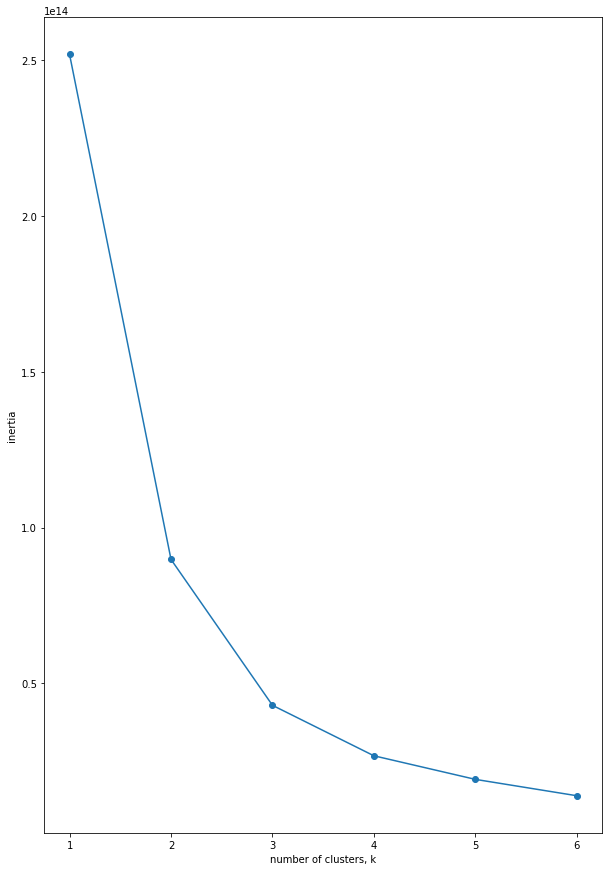

In [13]:
# Import KMeans to start, I'll try KNN afterwards
from sklearn.cluster import KMeans

ks = range(1, 7)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model =KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(10,15))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [14]:
 # Create a KMeans instance with k clusters: model
model =KMeans(n_clusters=4)

# Fit model to samples
model.fit(X_train)
model.score(X_test)

-132198161351150.7

In [15]:
model.predict(X_test)

array([3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0,
       0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [16]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
knn=X_train.copy()
knn['group']=model.predict(X_train)

In [18]:
knn.sort_index(inplace=True)

In [19]:
knn['Deaths']=y_train
knn

,Admin2,Province/State,Confirmed,Country/Region,Lat,Long_,Total_Pop,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage,group,Deaths
Combined_Key,,,,,,,,,,,,,,,
"Acadia, Louisiana, US",1,20,13609,1,30.295065,-92.414197,57576.0,11645.0,18.768636,32861.0,52.963172,1680,1646,0,260
"Accomack, Virginia, US",2,49,6230,1,37.767072,-75.632346,33413.0,10452.0,32.343112,23700.0,73.338284,1282,2749,0,86
"Ada, Idaho, US",3,14,99096,1,43.452658,-116.241552,494967.0,145690.0,30.252062,309559.0,64.278936,1597,2440,3,905
"Adair, Iowa, US",4,17,1434,1,41.330756,-94.471059,7496.0,2077.0,29.040828,3532.0,49.384787,1732,1100,0,46
"Adair, Kentucky, US",4,19,4450,1,37.104598,-85.281297,18903.0,3224.0,16.789918,7561.0,39.376107,2749,384,0,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"York, Virginia, US",1852,49,8597,1,37.243748,-76.544128,70045.0,22393.0,32.795841,41953.0,61.442589,2034,2435,0,87
"Young, Texas, US",1853,46,3522,1,33.176597,-98.687909,17867.0,2730.0,15.158245,7480.0,41.532482,2724,548,0,76
"Yuba, California, US",1854,7,14050,1,39.262559,-121.353564,81575.0,16455.0,20.917018,38164.0,48.512737,1836,1096,0,104


In [20]:
import seaborn as sns

<AxesSubplot:xlabel='Confirmed', ylabel='Total_Pop'>

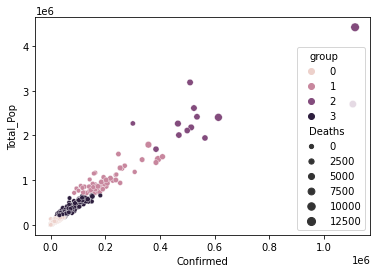

In [21]:
sns.scatterplot(x='Confirmed',y='Total_Pop', data=knn, hue='group', size='Deaths')

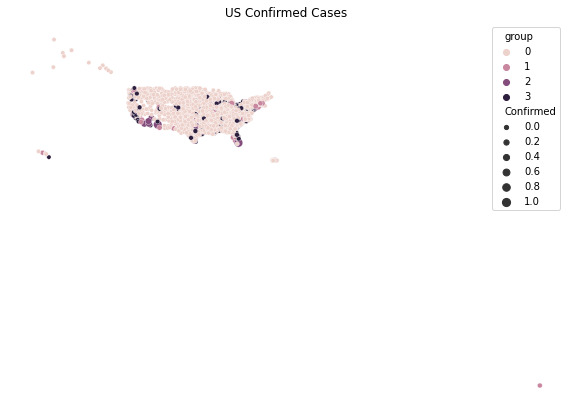

In [22]:
_=plt.figure(figsize=(10,7))
_=plt.title('US Confirmed Cases')
_=plt.axis('off')
_=sns.scatterplot(x='Long_',y='Lat', data=knn, hue='group', size='Confirmed')
plt.show()

In [ ]:
# American Samoa is that dot way out there...

In [ ]:
# now I need to map this onto the US county map

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

In [24]:
test_scores = []
train_scores = []
rmse_val =[]
for i in range(1,20):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train)) # Score on Trained data
    test_scores.append(knn.score(X_test,y_test)) # Score on Test data
    pred=knn.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

In [25]:
cf=pd.DataFrame([train_scores,test_scores, rmse_val]).transpose()
cf.rename(columns={0:'Train Score',1:'Test Score',2:'RMSE'}, inplace=True)
cf

,Train Score,Test Score,RMSE
0,1.000000,0.769405,635.882281
1,0.929268,0.706753,717.081789
2,0.898537,0.692515,734.283802
3,0.890546,0.694155,732.323085
4,0.892103,0.670611,759.987754
5,0.881768,0.626052,809.761752
6,0.866563,0.611511,825.356168
7,0.861970,0.604391,832.884438
8,0.861002,0.600189,837.296927
9,0.859277,0.592788,845.010841


In [26]:
import seaborn as sns

The score is  0.6925149084758433


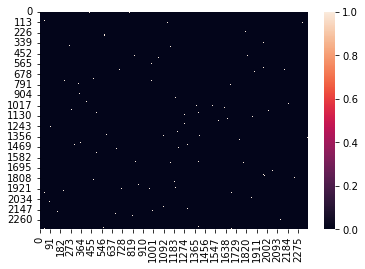

In [28]:
knn = KNeighborsRegressor(3)
knn.fit(X_train,y_train)

train_scores=(knn.score(X_train,y_train)) # Score on Trained data
test_scores=(knn.score(X_test,y_test)) # Score on Test data
pred=knn.predict(X_test) # make prediction on test set
sns.heatmap(knn.kneighbors_graph().toarray()) #draw a heatmap
print ('The score is ',test_scores)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


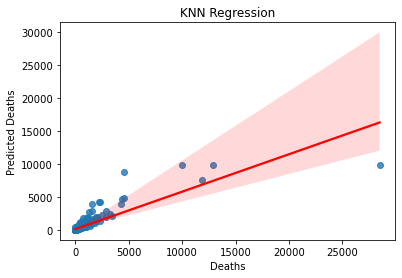

In [29]:
knn_plot=sns.regplot(y_test,pred,line_kws={"color": "red"})
knn_plot=plt.title('KNN Regression')
knn_plot=plt.xlabel('Deaths')
knn_plot=plt.ylabel('Predicted Deaths')
plt.show()

## Prediction by state

In [30]:
df5.groupby('Province/State').sum()

,Confirmed,Deaths,Lat,Long_,Total_Pop,Booster,Booster Coverage,Complete,Complete Coverage
Province/State,,,,,,,,,
District of Columbia,127200,1267,-77.005900,38.541700,718355.0,186903.0,26.482928,494497.0,70.066978
Virginia,312302,3236,787.008289,-1638.199665,1698933.0,456910.0,557.424751,950436.0,1154.237978
Alabama,1130535,16541,2168.787315,-5723.770370,4952671.0,825870.0,1033.282013,2289916.0,2903.539113
Alaska,78079,457,673.797279,-1649.790113,315371.0,65700.0,300.703177,163129.0,678.304014
Arizona,1752553,25623,505.138555,-1671.948482,7151502.0,1826933.0,417.518868,4373161.0,974.751029
Arkansas,718568,9515,2618.391704,-6932.548370,3011524.0,595002.0,1351.359659,1483910.0,3445.089075
California,7684314,78840,2194.949775,-7002.258461,39538223.0,14778137.0,1839.089298,27565971.0,3523.816683
Colorado,1185749,10809,2491.870366,-6751.119357,5773714.0,2062294.0,1921.701957,4533000.0,4266.605642
Connecticut,669097,9757,332.909441,-581.254637,3605944.0,1425902.0,320.044247,2770992.0,605.112440


In [35]:
# Groupby will help me get the state totals... But some of the data should be summed and others take the mean
mean=df5.groupby('Province/State').mean()
df7=df5.groupby('Province/State').sum()
df7['Lat']=mean['Lat'] # Sum of longitude and Latitude don't make sense.  The average should be within the boundry of the state
df7['Long_']=mean['Long_']
df7.drop(['Booster Coverage','Complete Coverage'], axis=1, inplace=True)
#df7['Partial Coverage']=mean['Partial Coverage']

df7

,Confirmed,Deaths,Lat,Long_,Total_Pop,Booster,Complete
Province/State,,,,,,,
District of Columbia,127200,1267,-77.005900,38.541700,718355.0,186903.0,494497.0
Virginia,312302,3236,37.476585,-78.009508,1698933.0,456910.0,950436.0
Alabama,1130535,16541,32.860414,-86.723793,4952671.0,825870.0,2289916.0
Alaska,78079,457,61.254298,-149.980919,315371.0,65700.0,163129.0
Arizona,1752553,25623,33.675904,-111.463232,7151502.0,1826933.0,4373161.0
Arkansas,718568,9515,34.911889,-92.433978,3011524.0,595002.0,1483910.0
California,7684314,78840,37.843962,-120.728594,39538223.0,14778137.0,27565971.0
Colorado,1185749,10809,38.935474,-105.486240,5773714.0,2062294.0,4533000.0
Connecticut,669097,9757,41.613680,-72.656830,3605944.0,1425902.0,2770992.0


In [36]:
X=df7.drop('Deaths',axis=1)
y=df7.Deaths

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(39, 6) (13, 6)
(39,) (13,)


In [37]:
test_scores = []
train_scores = []
rmse_val =[]
for i in range(1,20):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train)) # Score on Trained data
    test_scores.append(knn.score(X_test,y_test)) # Score on Test data
    pred=knn.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
cf=pd.DataFrame([train_scores,test_scores, rmse_val]).transpose()
cf.rename(columns={0:'Train Score',1:'Test Score',2:'RMSE'}, inplace=True)
cf

,Train Score,Test Score,RMSE
0,1.000000,0.882137,1988.129929
1,0.987201,0.877078,2030.351016
2,0.969463,0.866050,2119.465172
3,0.958167,0.837328,2335.672614
4,0.926379,0.821769,2444.821275
5,0.895489,0.729255,3013.256566
6,0.863533,0.767005,2795.305426
7,0.822209,0.720990,3058.901342
8,0.798866,0.690303,3222.733368
9,0.778645,0.680008,3275.857612


The score is  0.8770775691152468


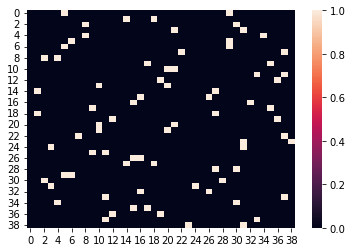

In [38]:
knn = KNeighborsRegressor(2)
knn.fit(X_train,y_train)

train_scores=(knn.score(X_train,y_train)) # Score on Trained data
test_scores=(knn.score(X_test,y_test)) # Score on Test data
pred=knn.predict(X_test) # make prediction on test set
sns.heatmap(knn.kneighbors_graph().toarray()) #draw a heatmap
print ('The score is ',test_scores)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


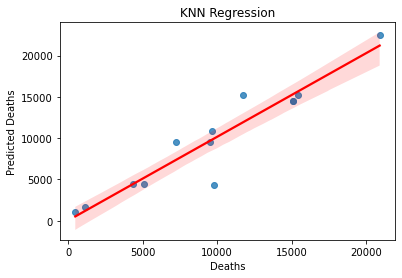

In [39]:
knn_plot=sns.regplot(y_test,pred,line_kws={"color": "red"})
knn_plot=plt.title('KNN Regression')
knn_plot=plt.xlabel('Deaths')
knn_plot=plt.ylabel('Predicted Deaths')
plt.show()

In [41]:
knn

KNeighborsRegressor(n_neighbors=2)

ValueError: Could not interpret value `Long_` for parameter `x`

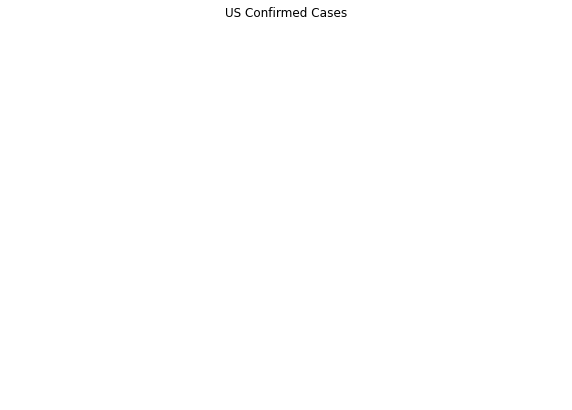

In [40]:
_=plt.figure(figsize=(10,7))
_=plt.title('US Confirmed Cases')
_=plt.axis('off')
_=sns.scatterplot(x='Long_',y='Lat', data=knn, hue='group', size='Confirmed')
plt.show()